# I. Modélisation statistique

In [29]:
!pip install s3fs
!pip install pandas
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn
!pip install matplotlib

## I.1. Chargement et préparation des données

### A) Importation des données

In [30]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

,beneficiaire_trans_eco,moyenne_conso_agri_hab,moyenne_conso_indus_hab,moyenne_conso_tertiaire_hab,moyenne_conso_residentiel_hab,moyenne_conso_totale_hab,emissions_ges,nb_actes_france_renov,friche,ecoquartiers,...,CSP_maire,com_variation_encours_dette_ha_pct,part_inactifs,part_actifs,dependance_eco,abstention_municipales,taux_creation_ent,total_entreprises,part_licencies_sportifs,part_jeunes_sans_diplome
code_insee,,,,,,,,,,,,,,,,,,,,,
22001,0,2.994071,0.000503,0.631181,3.688905,7.378017,14871,86,2,0,...,12,18.9,12.751678,47.147651,107,17.4,15.0,20,23.825503,9.1
22002,0,1.283886,0.032120,0.173206,3.248865,4.775226,8621,35,0,0,...,54,-39.3,11.062718,50.522648,96,53.8,12.1,33,30.836237,4.0
22003,0,0.000000,0.000000,0.524098,2.908468,3.472740,3028,47,0,0,...,56,99.8,14.239130,48.804348,113,53.7,36.7,30,35.760870,0.0
22004,0,0.200325,0.675332,1.267791,3.034877,5.203150,29130,46,6,0,...,33,-34.1,17.234927,40.540541,126,44.8,12.6,238,24.282744,12.4
22005,0,0.121358,0.082905,1.151104,3.532942,4.926877,4136,10,3,0,...,77,-14.5,14.188533,42.371234,140,22.9,18.8,64,27.891156,2.6


### B) Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles. 

In [31]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri_hab                float64
moyenne_conso_indus_hab               float64
moyenne_conso_tertiaire_hab           float64
moyenne_conso_residentiel_hab         float64
moyenne_conso_totale_hab              float64
emissions_ges                           int64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
part_residences_secondaires           float64
beneficiaire_prog                       int64
climat                                 object
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
p_pop                                   int64
CSP_maire                               int64
com_variation_encours_dette_ha_pct

In [32]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')


# Cas de la variable climat 
donnees = pd.get_dummies(donnees, columns = ["climat"]) # On crée des variables binaires pour la variable climat car on a des chaînes de caractères

In [33]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri_hab                 float64
moyenne_conso_indus_hab                float64
moyenne_conso_tertiaire_hab            float64
moyenne_conso_residentiel_hab          float64
moyenne_conso_totale_hab               float64
emissions_ges                            int64
nb_actes_france_renov                    int64
friche                                   int64
ecoquartiers                          category
part_residences_secondaires            float64
beneficiaire_prog                     category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
p_pop                                    int64
CSP_maire                             category
com_variation_encours_dette_ha_pct     float64
part_inactifs

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [34]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri_hab                0
moyenne_conso_indus_hab               0
moyenne_conso_tertiaire_hab           0
moyenne_conso_residentiel_hab         0
moyenne_conso_totale_hab              0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
part_residences_secondaires           0
beneficiaire_prog                     0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
part_inactifs                         0
part_actifs                           0
dependance_eco                        0
abstention_municipales                0


### C) Séparation de la variable à expliquer et des variables explicatives

In [35]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [36]:
# import numpy as np

# # Convertir les listes en tableaux numpy
# X = np.array(X)
# y = np.array(y)

In [37]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1189, 31)
Dimensions de y: (1189,)


In [38]:
# import numpy as np

# np.unique(y)

## I.2. Modélisation

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [40]:
X_train.shape, y_train.shape

((951, 31), (951,))

In [41]:
X_test.shape, y_test.shape

((238, 31), (238,))

## I.2.1. Régression logistique

### A) Construction des modèles

Nous allons maintenant définir notre modèle de régression logistique, sans pénalité.

In [42]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

etapes_reg_log_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('smote', SMOTE()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('adasyn', ADASYN()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_bordeline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('bordeline_smote', BorderlineSMOTE()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]


etapes_reg_log = [('std_scaler', StandardScaler()), 
                   ('reg_log', LogisticRegression())  
    
]
# Création des pipelines
modele_reg_log_smote  = Pipeline(steps=etapes_reg_log_smote) 
modele_reg_log_oversampler  = Pipeline(steps=etapes_reg_log_oversampler) 
modele_reg_log_adasyn  = Pipeline(steps=etapes_reg_log_adasyn)
modele_reg_log_bordeline_smote  = Pipeline(steps=etapes_reg_log_bordeline_smote)
modele_reg_log  = Pipeline(steps=etapes_reg_log)

On entraîne le modèle sur les données pour estimer les coefficients. 

In [43]:
modele_reg_log_smote.fit(X_train, y_train)
modele_reg_log_oversampler.fit(X_train, y_train)
modele_reg_log_adasyn.fit(X_train, y_train)
modele_reg_log_bordeline_smote.fit(X_train, y_train)
modele_reg_log.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('reg_log', LogisticRegression())])

On cherche à prédire de nouvelles données grâce aux données test

In [44]:
y_proba_reg_log_smote = modele_reg_log_smote.predict_proba(X_test)[:,1]
y_pred_reg_log_smote = modele_reg_log_smote.predict(X_test)

y_proba_reg_log_oversampler = modele_reg_log_oversampler.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler = modele_reg_log_oversampler.predict(X_test)

y_proba_reg_log_adasyn = modele_reg_log_adasyn.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn = modele_reg_log_adasyn.predict(X_test)

y_proba_reg_log_bordeline_smote = modele_reg_log_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_reg_log_bordeline_smote = modele_reg_log_bordeline_smote.predict(X_test)

y_proba_reg_log = modele_reg_log.predict_proba(X_test)[:, 1]
y_pred_reg_log = modele_reg_log.predict(X_test)

### B) Mesure de la performance des modèles initiaux

Nous allons maintenant évaluer la performance de notre modèle

In [45]:
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score


# Calcul des métriques
auc_roc_reg_log_smote = roc_auc_score(y_test, y_proba_reg_log_smote)
auc_pr_reg_log_smote  = average_precision_score(y_test, y_proba_reg_log_smote)
log_loss_value_reg_log_smote  = log_loss(y_test, y_proba_reg_log_smote)
precision_reg_log_smote  = precision_score(y_test, y_pred_reg_log_smote)
recall_reg_log_smote  = recall_score(y_test, y_pred_reg_log_smote)
f1_reg_log_smote = f1_score(y_test, y_pred_reg_log_smote)
mcc_reg_log_smote  = matthews_corrcoef(y_test, y_pred_reg_log_smote)
balanced_acc_reg_log_smote  = balanced_accuracy_score(y_test, y_pred_reg_log_smote)
specificity_reg_log_smote  = confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote)[0, 1])
cohen_kappa_reg_log_smote  = cohen_kappa_score(y_test, y_pred_reg_log_smote)

In [46]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_oversampler = roc_auc_score(y_test, y_proba_reg_log_oversampler)
auc_pr_reg_log_oversampler = average_precision_score(y_test, y_proba_reg_log_oversampler)
log_loss_value_reg_log_oversampler = log_loss(y_test, y_proba_reg_log_oversampler)
precision_reg_log_oversampler = precision_score(y_test, y_pred_reg_log_oversampler)
recall_reg_log_oversampler = recall_score(y_test, y_pred_reg_log_oversampler)
f1_reg_log_oversampler = f1_score(y_test, y_pred_reg_log_oversampler)
mcc_reg_log_oversampler = matthews_corrcoef(y_test, y_pred_reg_log_oversampler)
balanced_acc_reg_log_oversampler = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler)
specificity_reg_log_oversampler = confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 1])
cohen_kappa_reg_log_oversampler = cohen_kappa_score(y_test, y_pred_reg_log_oversampler)

In [47]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_adasyn = roc_auc_score(y_test, y_proba_reg_log_adasyn)
auc_pr_reg_log_adasyn = average_precision_score(y_test, y_proba_reg_log_adasyn)
log_loss_value_reg_log_adasyn = log_loss(y_test, y_proba_reg_log_adasyn)
precision_reg_log_adasyn = precision_score(y_test, y_pred_reg_log_adasyn)
recall_reg_log_adasyn = recall_score(y_test, y_pred_reg_log_adasyn)
f1_reg_log_adasyn = f1_score(y_test, y_pred_reg_log_adasyn)
mcc_reg_log_adasyn = matthews_corrcoef(y_test, y_pred_reg_log_adasyn)
balanced_acc_reg_log_adasyn = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn)
specificity_reg_log_adasyn = confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 1])
cohen_kappa_reg_log_adasyn = cohen_kappa_score(y_test, y_pred_reg_log_adasyn)

In [48]:
# Calcul des métriques

auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_bordeline_smote)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_bordeline_smote)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_bordeline_smote)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_bordeline_smote)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_bordeline_smote)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_bordeline_smote)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_bordeline_smote)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_bordeline_smote)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_bordeline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_bordeline_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_bordeline_smote)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_bordeline_smote)


In [49]:
auc_roc_reg_log = roc_auc_score(y_test, y_proba_reg_log)
auc_pr_reg_log = average_precision_score(y_test, y_proba_reg_log)
log_loss_value_reg_log = log_loss(y_test, y_proba_reg_log)
precision_reg_log = precision_score(y_test, y_pred_reg_log)
recall_reg_log = recall_score(y_test, y_pred_reg_log)
f1_reg_log = f1_score(y_test, y_pred_reg_log)
mcc_reg_log = matthews_corrcoef(y_test, y_pred_reg_log)
balanced_acc_reg_log = balanced_accuracy_score(y_test, y_pred_reg_log)
specificity_reg_log = confusion_matrix(y_test, y_pred_reg_log)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log)[0, 0] + confusion_matrix(y_test, y_pred_reg_log)[0, 1])
cohen_kappa_reg_log = cohen_kappa_score(y_test, y_pred_reg_log)

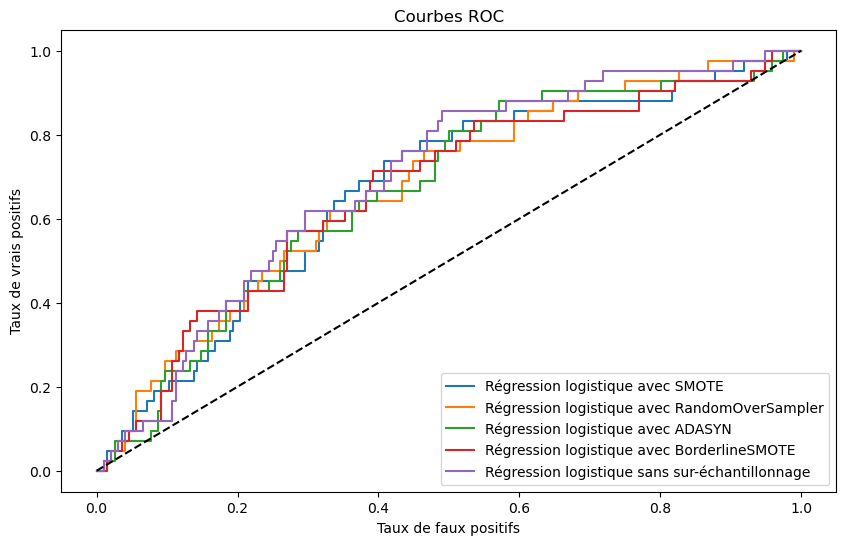

In [50]:
# Comparaison des courbes ROC

from sklearn.metrics import roc_curve

fpr_reg_log_smote, tpr_reg_log_smote, _ = roc_curve(y_test, y_proba_reg_log_smote)
fpr_reg_log_oversampler, tpr_reg_log_oversampler, _ = roc_curve(y_test, y_proba_reg_log_oversampler)
fpr_reg_log_adasyn, tpr_reg_log_adasyn, _ = roc_curve(y_test, y_proba_reg_log_adasyn)
fpr_reg_log_bordeline_smote, tpr_reg_log_bordeline_smote, _ = roc_curve(y_test, y_proba_reg_log_bordeline_smote)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote, tpr_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler, tpr_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn, tpr_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_bordeline_smote, tpr_reg_log_bordeline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

plt.show()

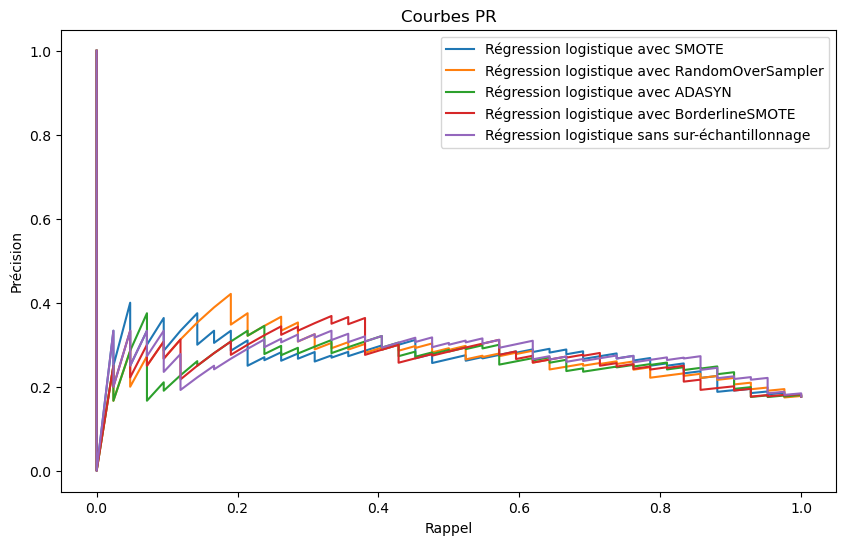

In [57]:
# Comparaison des courbes PR

from sklearn.metrics import precision_recall_curve

precision_reg_log_smote, recall_reg_log_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_smote)
precision_reg_log_oversampler, recall_reg_log_oversampler, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler)
precision_reg_log_adasyn, recall_reg_log_adasyn, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn)
precision_reg_log_bordeline_smote, recall_reg_log_bordeline_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_bordeline_smote)
precision_reg_log, recall_reg_log, _ = precision_recall_curve(y_test, y_proba_reg_log)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote, precision_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler, precision_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn, precision_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_bordeline_smote, precision_reg_log_bordeline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log, precision_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')
plt.legend()
plt.show()

In [56]:
# Résultats 

resultats_reg_log = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log, auc_pr_reg_log, log_loss_value_reg_log, f1_reg_log, mcc_reg_log, balanced_acc_reg_log, specificity_reg_log, cohen_kappa_reg_log],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote, auc_pr_reg_log_smote, log_loss_value_reg_log_smote, f1_reg_log_smote, mcc_reg_log_smote, balanced_acc_reg_log_smote, specificity_reg_log_smote, cohen_kappa_reg_log_smote],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler, auc_pr_reg_log_oversampler, log_loss_value_reg_log_oversampler,  f1_reg_log_oversampler, mcc_reg_log_oversampler, balanced_acc_reg_log_oversampler, specificity_reg_log_oversampler, cohen_kappa_reg_log_oversampler],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn, auc_pr_reg_log_adasyn, log_loss_value_reg_log_adasyn, f1_reg_log_adasyn, mcc_reg_log_adasyn, balanced_acc_reg_log_adasyn, specificity_reg_log_adasyn, cohen_kappa_reg_log_adasyn],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote, log_loss_value_reg_log_borderline_smote,  f1_reg_log_borderline_smote, mcc_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote, specificity_reg_log_borderline_smote, cohen_kappa_reg_log_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log = resultats_reg_log.round(3)
resultats_reg_log

,Régression logistique sans sur-échantillonnage,Régression logistique avec SMOTE,Régression logistique avec RandomOverSampler,Régression logistique avec ADASYN,Régression logistique avec BorderlineSMOTE
AUC-ROC,0.694,0.670,0.672,0.666,0.666
AUC-PR,0.286,0.281,0.283,0.269,0.278
Log loss,0.450,0.660,0.660,0.653,0.654
F1,0.044,0.400,0.358,0.361,0.385
MCC,0.046,0.239,0.179,0.180,0.216
Accuracy,0.507,0.653,0.611,0.615,0.637
Spécificité,0.990,0.663,0.699,0.658,0.679
Kappa,0.021,0.207,0.163,0.157,0.191


### C) Ajustement des hyperparamètres

Pour la régression logistique, les hyperparamètres les plus courants à optimiser sont :
- C : Ce paramètre de régularisation inverse. Une valeur plus petite indique une régularisation plus forte.
- solver : L'algorithme utilisé pour l'optimisation. Les choix courants sont 'liblinear', 'lbfgs', 'saga', etc.
- penalty : Le type de régularisation à utiliser ('l1', 'l2', 'elasticnet', 'none')
- fonction de lien 

In [59]:
# Ajustement de chaque modèle

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, cohen_kappa_score, f1_score

# Définir les paramètres de la grille
grille_param = {
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'None'], # Type de régularisation
}

# Choix des métriques pour l'optimisation
scoring = {
    'F1': make_scorer(f1_score), 
    'Kappa': make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}


# Création de la grille de recherche
grille_recherche_reg_log_smote = GridSearchCV(modele_reg_log_smote, grille_param, cv=5, scoring=scoring, refit='AUC')
grille_recherche_reg_log_oversampler = GridSearchCV(modele_reg_log_oversampler, grille_param, cv=5, scoring=scoring, refit='AUC')
grille_recherche_reg_log_adasyn = GridSearchCV(modele_reg_log_adasyn, grille_param, cv=5, scoring=scoring, refit='AUC')
grille_recherche_reg_log_bordeline_smote = GridSearchCV(modele_reg_log_bordeline_smote, grille_param, cv=5, scoring=scoring, refit='AUC')
grille_recherche_reg_log = GridSearchCV(modele_reg_log, grille_param, cv=5, scoring=scoring, refit='AUC')

# Ajustement de la grille de recherche
grille_recherche_reg_log_smote.fit(X_train, y_train)
grille_recherche_reg_log_oversampler.fit(X_train, y_train)
grille_recherche_reg_log_adasyn.fit(X_train, y_train)
grille_recherche_reg_log_bordeline_smote.fit(X_train, y_train)
grille_recherche_reg_log.fit(X_train, y_train)

# Récupération des résultats de la grille de recherche
resultats_grille_reg_log_smote = grille_recherche_reg_log_smote.cv_results_
resultats_grille_reg_log_oversampler = grille_recherche_reg_log_oversampler.cv_results_
resultats_grille_reg_log_adasyn = grille_recherche_reg_log_adasyn.cv_results_
resultats_grille_reg_log_bordeline_smote = grille_recherche_reg_log_bordeline_smote.cv_results_
resultats_grille_reg_log = grille_recherche_reg_log.cv_results_

# Récupération des meilleurs paramètres
meilleurs_parametres_reg_log_smote = grille_recherche_reg_log_smote.best_params_
meilleurs_parametres_reg_log_oversampler = grille_recherche_reg_log_oversampler.best_params_
meilleurs_parametres_reg_log_adasyn = grille_recherche_reg_log_adasyn.best_params_
meilleurs_parametres_reg_log_bordeline_smote = grille_recherche_reg_log_bordeline_smote.best_params_
meilleurs_parametres_reg_log = grille_recherche_reg_log.best_params_

# Récupération des meilleurs scores
meilleur_score_reg_log_smote = grille_recherche_reg_log_smote.best_score_
meilleur_score_reg_log_oversampler = grille_recherche_reg_log_oversampler.best_score_
meilleur_score_reg_log_adasyn = grille_recherche_reg_log_adasyn.best_score_
meilleur_score_reg_log_bordeline_smote = grille_recherche_reg_log_bordeline_smote.best_score_
meilleur_score_reg_log = grille_recherche_reg_log.best_score_

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [60]:
# Ajustement des modèles
modele_reg_log_smote_cv = grille_recherche_reg_log_smote.best_estimator_
modele_reg_log_oversampler_cv = grille_recherche_reg_log_oversampler.best_estimator_
modele_reg_log_adasyn_cv = grille_recherche_reg_log_adasyn.best_estimator_
modele_reg_log_bordeline_smote_cv = grille_recherche_reg_log_bordeline_smote.best_estimator_
modele_reg_log_cv = grille_recherche_reg_log.best_estimator_

# Prédiction sur l'échantillon test
y_proba_reg_log_smote_cv = modele_reg_log_smote_cv.predict_proba(X_test)[:, 1]
y_pred_reg_log_smote_cv = modele_reg_log_smote_cv.predict(X_test)

y_proba_reg_log_oversampler_cv = modele_reg_log_oversampler_cv.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler_cv = modele_reg_log_oversampler_cv.predict(X_test)

y_proba_reg_log_adasyn_cv = modele_reg_log_adasyn_cv.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn_cv = modele_reg_log_adasyn_cv.predict(X_test)

y_proba_reg_log_bordeline_smote_cv = modele_reg_log_bordeline_smote_cv.predict_proba(X_test)[:, 1]
y_pred_reg_log_bordeline_smote_cv = modele_reg_log_bordeline_smote_cv.predict(X_test)

y_proba_reg_log_cv = modele_reg_log_cv.predict_proba(X_test)[:, 1]
y_pred_reg_log_cv = modele_reg_log_cv.predict(X_test)


### D) Mesure de la performance des modèles optimisés

In [61]:
# Calcul des métriques pour chaque modèle

# Calcul des métriques
auc_roc_reg_log_smote_cv = roc_auc_score(y_test, y_proba_reg_log_smote_cv)
auc_pr_reg_log_smote_cv = average_precision_score(y_test, y_proba_reg_log_smote_cv)
log_loss_value_reg_log_smote_cv = log_loss(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_smote_cv = precision_score(y_test, y_pred_reg_log_smote_cv)
recall_reg_log_smote_cv = recall_score(y_test, y_pred_reg_log_smote_cv)
f1_reg_log_smote_cv = f1_score(y_test, y_pred_reg_log_smote_cv)
mcc_reg_log_smote_cv = matthews_corrcoef(y_test, y_pred_reg_log_smote_cv)
balanced_acc_reg_log_smote_cv = balanced_accuracy_score(y_test, y_pred_reg_log_smote_cv)
specificity_reg_log_smote_cv = confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote_cv)[0, 1])
cohen_kappa_reg_log_smote_cv = cohen_kappa_score(y_test, y_pred_reg_log_smote_cv)

In [62]:
auc_roc_reg_log_oversampler_cv = roc_auc_score(y_test, y_proba_reg_log_oversampler_cv)
auc_pr_reg_log_oversampler_cv = average_precision_score(y_test, y_proba_reg_log_oversampler_cv)
log_loss_value_reg_log_oversampler_cv = log_loss(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_oversampler_cv = precision_score(y_test, y_pred_reg_log_oversampler_cv)
recall_reg_log_oversampler_cv = recall_score(y_test, y_pred_reg_log_oversampler_cv)
f1_reg_log_oversampler_cv = f1_score(y_test, y_pred_reg_log_oversampler_cv)
mcc_reg_log_oversampler_cv = matthews_corrcoef(y_test, y_pred_reg_log_oversampler_cv)
balanced_acc_reg_log_oversampler_cv = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler_cv)
specificity_reg_log_oversampler_cv = confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler_cv)[0, 1])
cohen_kappa_reg_log_oversampler_cv = cohen_kappa_score(y_test, y_pred_reg_log_oversampler_cv)

In [63]:
auc_roc_reg_log_adasyn_cv = roc_auc_score(y_test, y_proba_reg_log_adasyn_cv)
auc_pr_reg_log_adasyn_cv = average_precision_score(y_test, y_proba_reg_log_adasyn_cv)   
log_loss_value_reg_log_adasyn_cv = log_loss(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_adasyn_cv = precision_score(y_test, y_pred_reg_log_adasyn_cv)
recall_reg_log_adasyn_cv = recall_score(y_test, y_pred_reg_log_adasyn_cv)
f1_reg_log_adasyn_cv = f1_score(y_test, y_pred_reg_log_adasyn_cv)
mcc_reg_log_adasyn_cv = matthews_corrcoef(y_test, y_pred_reg_log_adasyn_cv)
balanced_acc_reg_log_adasyn_cv = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn_cv)
specificity_reg_log_adasyn_cv = confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn_cv)[0, 1])
cohen_kappa_reg_log_adasyn_cv = cohen_kappa_score(y_test, y_pred_reg_log_adasyn_cv)

In [64]:
auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_bordeline_smote_cv)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_bordeline_smote_cv)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_bordeline_smote_cv)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_bordeline_smote_cv)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_bordeline_smote_cv)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_bordeline_smote_cv)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_bordeline_smote_cv)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_bordeline_smote_cv)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_bordeline_smote_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_bordeline_smote_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_bordeline_smote_cv)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_bordeline_smote_cv)

In [65]:
auc_roc_reg_log_cv = roc_auc_score(y_test, y_proba_reg_log_cv)
auc_pr_reg_log_cv = average_precision_score(y_test, y_proba_reg_log_cv)
log_loss_value_reg_log_cv = log_loss(y_test, y_proba_reg_log_cv)
precision_reg_log_cv = precision_score(y_test, y_pred_reg_log_cv)
recall_reg_log_cv = recall_score(y_test, y_pred_reg_log_cv)
f1_reg_log_cv = f1_score(y_test, y_pred_reg_log_cv)
mcc_reg_log_cv = matthews_corrcoef(y_test, y_pred_reg_log_cv)
balanced_acc_reg_log_cv = balanced_accuracy_score(y_test, y_pred_reg_log_cv)
specificity_reg_log_cv = confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_cv)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_cv)[0, 1])
cohen_kappa_reg_log_cv = cohen_kappa_score(y_test, y_pred_reg_log_cv)

In [68]:
# Affichage des résultats

resultats_reg_log_cv = pd.DataFrame({
    "Régression logistique sans sur-échantillonnage": [auc_roc_reg_log_cv, auc_pr_reg_log_cv, log_loss_value_reg_log_cv, f1_reg_log_cv, mcc_reg_log_cv, balanced_acc_reg_log_cv, specificity_reg_log_cv, cohen_kappa_reg_log_cv],
    "Régression logistique avec SMOTE": [auc_roc_reg_log_smote_cv, auc_pr_reg_log_smote_cv, log_loss_value_reg_log_smote_cv, f1_reg_log_smote_cv, mcc_reg_log_smote_cv, balanced_acc_reg_log_smote_cv, specificity_reg_log_smote_cv, cohen_kappa_reg_log_smote_cv],
    "Régression logistique avec RandomOverSampler": [auc_roc_reg_log_oversampler_cv, auc_pr_reg_log_oversampler_cv, log_loss_value_reg_log_oversampler_cv, f1_reg_log_oversampler_cv, mcc_reg_log_oversampler_cv, balanced_acc_reg_log_oversampler_cv, specificity_reg_log_oversampler_cv, cohen_kappa_reg_log_oversampler_cv],
    "Régression logistique avec ADASYN": [auc_roc_reg_log_adasyn_cv, auc_pr_reg_log_adasyn_cv, log_loss_value_reg_log_adasyn_cv, f1_reg_log_adasyn_cv, mcc_reg_log_adasyn_cv, balanced_acc_reg_log_adasyn_cv, specificity_reg_log_adasyn_cv, cohen_kappa_reg_log_adasyn_cv],
    "Régression logistique avec BorderlineSMOTE": [auc_roc_reg_log_borderline_smote, auc_pr_reg_log_borderline_smote, log_loss_value_reg_log_borderline_smote, f1_reg_log_borderline_smote, mcc_reg_log_borderline_smote, balanced_acc_reg_log_borderline_smote, specificity_reg_log_borderline_smote, cohen_kappa_reg_log_borderline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_reg_log_cv = resultats_reg_log_cv.round(3)
resultats_reg_log_cv

,Régression logistique sans sur-échantillonnage,Régression logistique avec SMOTE,Régression logistique avec RandomOverSampler,Régression logistique avec ADASYN,Régression logistique avec BorderlineSMOTE
AUC-ROC,0.698,0.678,0.693,0.680,0.670
AUC-PR,0.294,0.280,0.287,0.284,0.279
Log loss,0.448,0.656,0.651,0.655,0.650
F1,0.000,0.422,0.415,0.403,0.406
MCC,-0.043,0.271,0.262,0.244,0.248
Accuracy,0.495,0.671,0.666,0.656,0.658
Spécificité,0.990,0.699,0.689,0.668,0.673
Kappa,-0.016,0.242,0.232,0.212,0.217


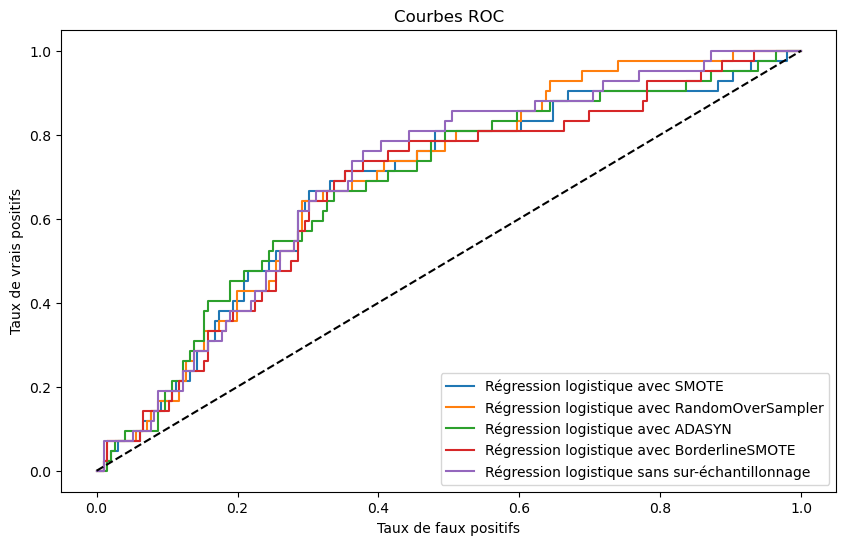

In [69]:
# Comparaison des courbes ROC

fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_smote_cv)
fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, _ = roc_curve(y_test, y_proba_reg_log_oversampler_cv)
fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, _ = roc_curve(y_test, y_proba_reg_log_adasyn_cv)
fpr_reg_log_bordeline_smote_cv, tpr_reg_log_bordeline_smote_cv, _ = roc_curve(y_test, y_proba_reg_log_bordeline_smote_cv)
fpr_reg_log, tpr_reg_log, _ = roc_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote_cv, tpr_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler_cv, tpr_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn_cv, tpr_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_bordeline_smote_cv, tpr_reg_log_bordeline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(fpr_reg_log, tpr_reg_log, label='Régression logistique sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

plt.show()

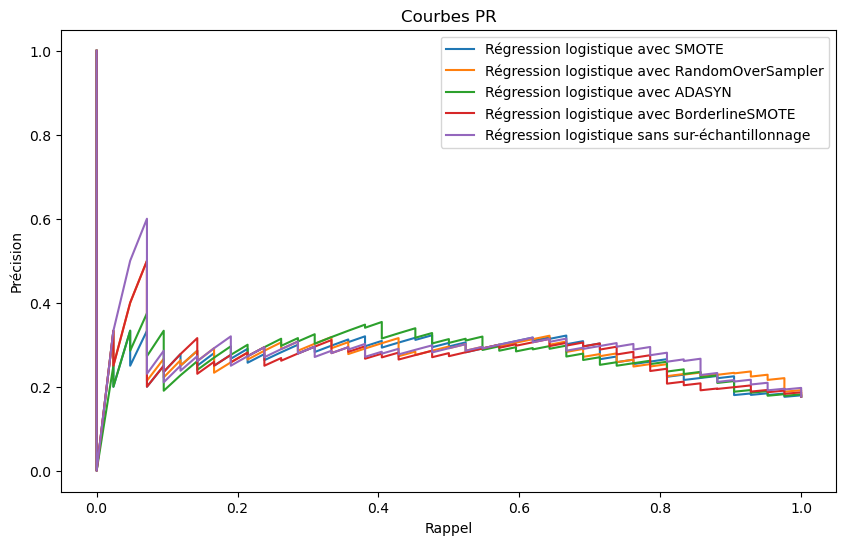

In [70]:
# Comparaison des courbes PR

precision_reg_log_smote_cv, recall_reg_log_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_smote_cv)
precision_reg_log_oversampler_cv, recall_reg_log_oversampler_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler_cv)
precision_reg_log_adasyn_cv, recall_reg_log_adasyn_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn_cv)
precision_reg_log_bordeline_smote_cv, recall_reg_log_bordeline_smote_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_bordeline_smote_cv)
precision_reg_log_cv, recall_reg_log_cv, _ = precision_recall_curve(y_test, y_proba_reg_log_cv)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote_cv, precision_reg_log_smote_cv, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler_cv, precision_reg_log_oversampler_cv, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn_cv, precision_reg_log_adasyn_cv, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_bordeline_smote_cv, precision_reg_log_bordeline_smote_cv, label='Régression logistique avec BorderlineSMOTE')
plt.plot(recall_reg_log_cv, precision_reg_log_cv, label='Régression logistique sans sur-échantillonnage')

plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')

plt.legend()
plt.show()

### E) Importance des variables

In [75]:
# Importance des variables

# Récupération des coefficients de la régression logistique
coefficients_reg_log_smote = modele_reg_log_smote_cv.named_steps['reg_log'].coef_[0]
coefficients_reg_log_oversampler = modele_reg_log_oversampler_cv.named_steps['reg_log'].coef_[0]
coefficients_reg_log_adasyn = modele_reg_log_adasyn_cv.named_steps['reg_log'].coef_[0]
coefficients_reg_log_bordeline_smote = modele_reg_log_bordeline_smote_cv.named_steps['reg_log'].coef_[0]
coefficients_reg_log = modele_reg_log_cv.named_steps['reg_log'].coef_[0]

# Récupération des noms des variables
noms_variables = X.columns

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_reg_log_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_smote
})

resultats_importance_variables_reg_log_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_oversampler
})

resultats_importance_variables_reg_log_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_adasyn
})

resultats_importance_variables_reg_log_bordeline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log_bordeline_smote
})

resultats_importance_variables_reg_log = pd.DataFrame({
    "Variable": noms_variables,
    "Coefficient": coefficients_reg_log
})

# Affichage des résultats
resultats_importance_variables_reg_log_smote = resultats_importance_variables_reg_log_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_oversampler = resultats_importance_variables_reg_log_oversampler.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_adasyn = resultats_importance_variables_reg_log_adasyn.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log_bordeline_smote = resultats_importance_variables_reg_log_bordeline_smote.sort_values(by="Coefficient", ascending=False)
resultats_importance_variables_reg_log = resultats_importance_variables_reg_log.sort_values(by="Coefficient", ascending=False)

resultats_importance_variables_reg_log_smote

,Variable,Coefficient
12,superf_choro,0.259719
7,friche,0.155336
23,abstention_municipales,0.080646
26,part_licencies_sportifs,0.074221
15,part_trajets_voiture,0.073335
30,climat_Mer,0.064710
16,med_disp,0.058459
14,gare_tgv,0.048642
6,nb_actes_france_renov,0.039884
20,part_inactifs,0.035749


In [72]:
resultats_importance_variables_reg_log_oversampler

,Variable,Coefficient
12,superf_choro,0.250123
7,friche,0.134443
14,gare_tgv,0.095169
26,part_licencies_sportifs,0.075185
30,climat_Mer,0.066658
23,abstention_municipales,0.050980
2,moyenne_conso_tertiaire_hab,0.042725
22,dependance_eco,0.037309
20,part_inactifs,0.032911
1,moyenne_conso_indus_hab,0.025090


In [73]:
resultats_importance_variables_reg_log_adasyn

,Variable,Coefficient
12,superf_choro,0.240662
7,friche,0.106356
26,part_licencies_sportifs,0.072132
30,climat_Mer,0.059546
23,abstention_municipales,0.057754
15,part_trajets_voiture,0.056089
22,dependance_eco,0.055626
14,gare_tgv,0.049793
6,nb_actes_france_renov,0.041319
16,med_disp,0.023377


In [74]:
resultats_importance_variables_reg_log_bordeline_smote

,Variable,Coefficient
12,superf_choro,0.272325
7,friche,0.128760
26,part_licencies_sportifs,0.117256
23,abstention_municipales,0.114133
14,gare_tgv,0.088453
30,climat_Mer,0.077267
20,part_inactifs,0.043805
22,dependance_eco,0.043724
15,part_trajets_voiture,0.040166
16,med_disp,0.039225


In [76]:
resultats_importance_variables_reg_log

,Variable,Coefficient
12,superf_choro,0.159774
7,friche,0.101958
14,gare_tgv,0.083682
23,abstention_municipales,0.065148
26,part_licencies_sportifs,0.047257
30,climat_Mer,0.042990
6,nb_actes_france_renov,0.040018
16,med_disp,0.032111
22,dependance_eco,0.028473
2,moyenne_conso_tertiaire_hab,0.022674


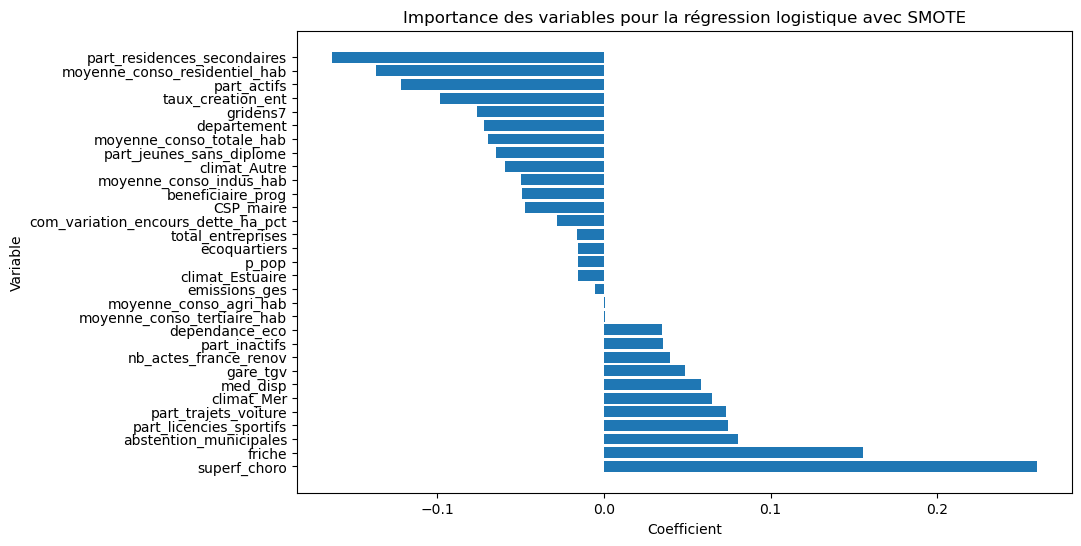

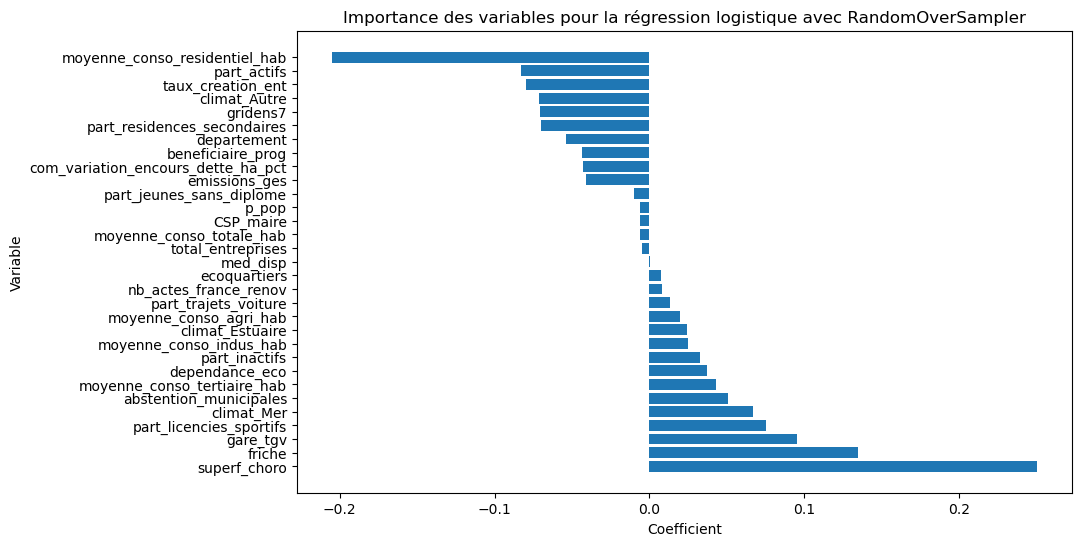

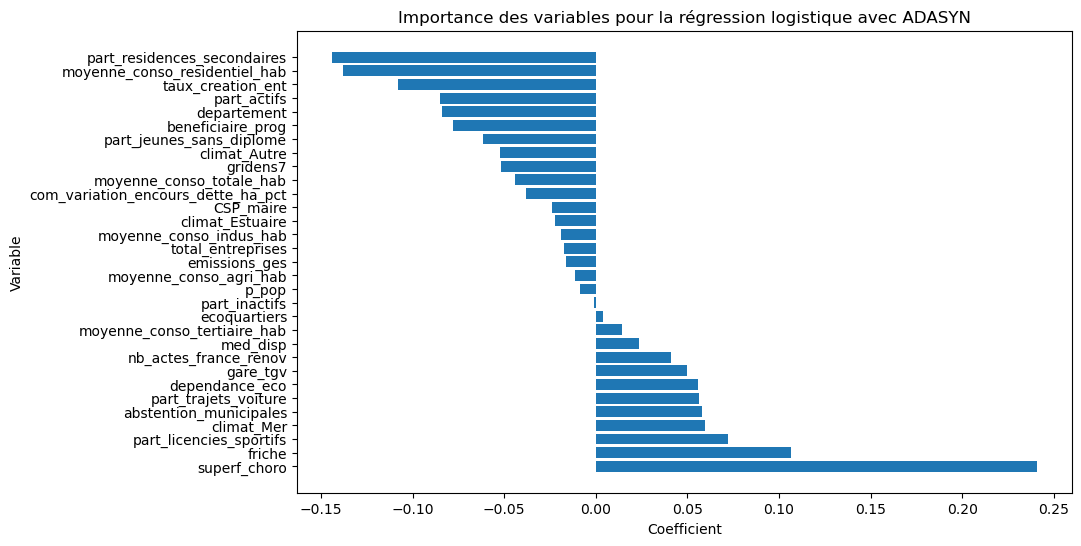

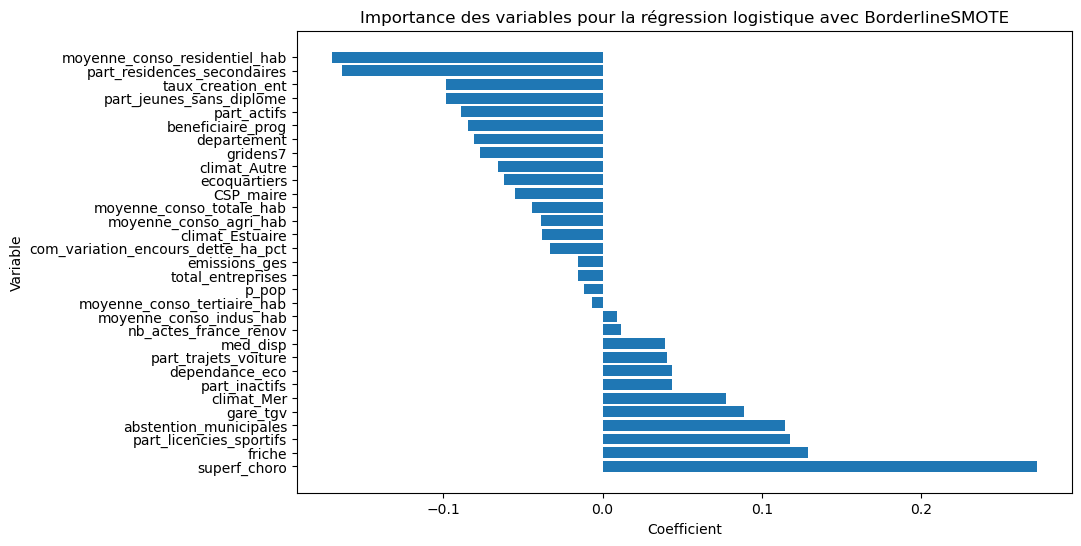

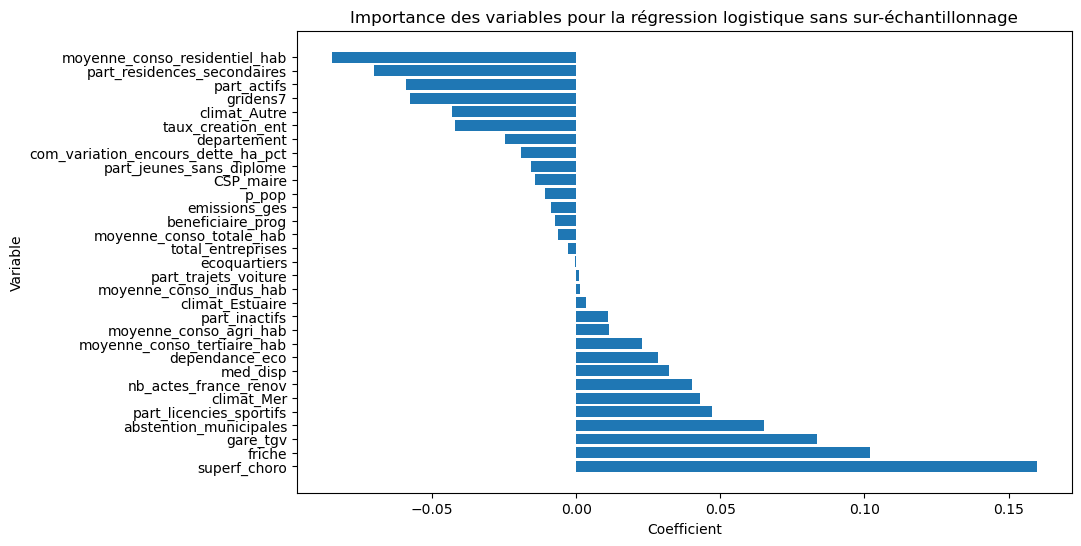

In [77]:
# Graphique pour l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_smote["Variable"], resultats_importance_variables_reg_log_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec SMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_oversampler["Variable"], resultats_importance_variables_reg_log_oversampler["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec RandomOverSampler")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_adasyn["Variable"], resultats_importance_variables_reg_log_adasyn["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec ADASYN")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log_bordeline_smote["Variable"], resultats_importance_variables_reg_log_bordeline_smote["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique avec BorderlineSMOTE")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_reg_log["Variable"], resultats_importance_variables_reg_log["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Importance des variables pour la régression logistique sans sur-échantillonnage")
plt.show()

## I.2.3. Abres de décision

### A) Construction des modèles

In [80]:
# Construction du modèle d'arbres de décision avec rééquilibrage des classes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.pipeline import Pipeline

etapes_arbre_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbre_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbre_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbre_bordeline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('bordeline_smote', BorderlineSMOTE()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

etapes_arbres = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('arbre', DecisionTreeClassifier(max_depth=5)), # Arbre de décision
        ]

# Justification de max_depth=5 : pour éviter l'overfitting
# On a choisi la valeur 5 car c'est une valeur standard qui permet de ne pas trop complexifier l'arbre de décision

modele_arbre_oversampler = Pipeline(steps=etapes_arbre_oversampler) # Création du pipeline
modele_arbre_smote = Pipeline(steps=etapes_arbre_smote) # Création du pipeline
modele_arbre_adasyn = Pipeline(steps=etapes_arbre_adasyn) # Création du pipeline
modele_arbre_bordeline_smote = Pipeline(steps=etapes_arbre_bordeline_smote) # Création du pipeline
modele_arbre = Pipeline(steps=etapes_arbres) # Création du pipeline

In [81]:
modele_arbre_oversampler.fit(X_train, y_train) # Entraînement
modele_arbre_smote.fit(X_train, y_train) # Entraînement
modele_arbre_adasyn.fit(X_train, y_train) # Entraînement
modele_arbre_bordeline_smote.fit(X_train, y_train) # Entraînement
modele_arbre.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('arbre', DecisionTreeClassifier(max_depth=5))])

In [82]:
# Prédictions

y_proba_arbre_oversampler = modele_arbre_oversampler.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler = modele_arbre_oversampler.predict(X_test)

y_proba_arbre_smote = modele_arbre_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_smote = modele_arbre_smote.predict(X_test)

y_proba_arbre_adasyn = modele_arbre_adasyn.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn = modele_arbre_adasyn.predict(X_test)

y_proba_arbre_bordeline_smote = modele_arbre_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_bordeline_smote = modele_arbre_bordeline_smote.predict(X_test)

y_proba_arbre = modele_arbre.predict_proba(X_test)[:, 1]
y_pred_arbre = modele_arbre.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [83]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_arbre_oversampler = roc_auc_score(y_test, y_proba_arbre_oversampler)
auc_pr_arbre_oversampler = average_precision_score(y_test, y_proba_arbre_oversampler)
log_loss_value_arbre_oversampler = log_loss(y_test, y_proba_arbre_oversampler)
precision_arbre_oversampler = precision_score(y_test, y_pred_arbre_oversampler)
recall_arbre_oversampler = recall_score(y_test, y_pred_arbre_oversampler)
f1_arbre_oversampler = f1_score(y_test, y_pred_arbre_oversampler)
mcc_arbre_oversampler = matthews_corrcoef(y_test, y_pred_arbre_oversampler)
balanced_acc_arbre_oversampler = balanced_accuracy_score(y_test, y_pred_arbre_oversampler)
specificity_arbre_oversampler = confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 1])
cohen_kappa_arbre_oversampler = cohen_kappa_score(y_test, y_pred_arbre_oversampler)

In [84]:
auc_roc_arbre_smote = roc_auc_score(y_test, y_proba_arbre_smote)
auc_pr_arbre_smote = average_precision_score(y_test, y_proba_arbre_smote)
log_loss_value_arbre_smote = log_loss(y_test, y_proba_arbre_smote)
precision_arbre_smote = precision_score(y_test, y_pred_arbre_smote)
recall_arbre_smote = recall_score(y_test, y_pred_arbre_smote)
f1_arbre_smote = f1_score(y_test, y_pred_arbre_smote)
mcc_arbre_smote = matthews_corrcoef(y_test, y_pred_arbre_smote)
balanced_acc_arbre_smote = balanced_accuracy_score(y_test, y_pred_arbre_smote)
specificity_arbre_smote = confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote)[0, 1])
cohen_kappa_arbre_smote = cohen_kappa_score(y_test, y_pred_arbre_smote)

In [85]:
auc_roc_arbre_adasyn = roc_auc_score(y_test, y_proba_arbre_adasyn)
auc_pr_arbre_adasyn = average_precision_score(y_test, y_proba_arbre_adasyn)
log_loss_value_arbre_adasyn = log_loss(y_test, y_proba_arbre_adasyn)
precision_arbre_adasyn = precision_score(y_test, y_pred_arbre_adasyn)
recall_arbre_adasyn = recall_score(y_test, y_pred_arbre_adasyn)
f1_arbre_adasyn = f1_score(y_test, y_pred_arbre_adasyn)
mcc_arbre_adasyn = matthews_corrcoef(y_test, y_pred_arbre_adasyn)
balanced_acc_arbre_adasyn = balanced_accuracy_score(y_test, y_pred_arbre_adasyn)
specificity_arbre_adasyn = confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 1])
cohen_kappa_arbre_adasyn = cohen_kappa_score(y_test, y_pred_arbre_adasyn)

In [86]:
auc_roc_arbre_bordeline_smote = roc_auc_score(y_test, y_proba_arbre_bordeline_smote)
auc_pr_arbre_bordeline_smote = average_precision_score(y_test, y_proba_arbre_bordeline_smote)
log_loss_value_arbre_bordeline_smote = log_loss(y_test, y_proba_arbre_bordeline_smote)
precision_arbre_bordeline_smote = precision_score(y_test, y_pred_arbre_bordeline_smote)
recall_arbre_bordeline_smote = recall_score(y_test, y_pred_arbre_bordeline_smote)
f1_arbre_bordeline_smote = f1_score(y_test, y_pred_arbre_bordeline_smote)
mcc_arbre_bordeline_smote = matthews_corrcoef(y_test, y_pred_arbre_bordeline_smote)
balanced_acc_arbre_bordeline_smote = balanced_accuracy_score(y_test, y_pred_arbre_bordeline_smote)
specificity_arbre_bordeline_smote = confusion_matrix(y_test, y_pred_arbre_bordeline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_bordeline_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_bordeline_smote)[0, 1])
cohen_kappa_arbre_bordeline_smote = cohen_kappa_score(y_test, y_pred_arbre_bordeline_smote)

In [87]:
auc_roc_arbre = roc_auc_score(y_test, y_proba_arbre)   
auc_pr_arbre = average_precision_score(y_test, y_proba_arbre)
log_loss_value_arbre = log_loss(y_test, y_proba_arbre)
precision_arbre = precision_score(y_test, y_pred_arbre)
recall_arbre = recall_score(y_test, y_pred_arbre)
f1_arbre = f1_score(y_test, y_pred_arbre)
mcc_arbre = matthews_corrcoef(y_test, y_pred_arbre)
balanced_acc_arbre = balanced_accuracy_score(y_test, y_pred_arbre)
specificity_arbre = confusion_matrix(y_test, y_pred_arbre)[0, 0] / (confusion_matrix(y_test, y_pred_arbre)[0, 0] + confusion_matrix(y_test, y_pred_arbre)[0, 1])
cohen_kappa_arbre = cohen_kappa_score(y_test, y_pred_arbre)

In [88]:
# Affichage des résultats
resultats_arbres = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre, auc_pr_arbre, log_loss_value_arbre, f1_arbre, mcc_arbre, balanced_acc_arbre, specificity_arbre, cohen_kappa_arbre],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote, auc_pr_arbre_smote, log_loss_value_arbre_smote, f1_arbre_smote, mcc_arbre_smote, balanced_acc_arbre_smote, specificity_arbre_smote, cohen_kappa_arbre_smote],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler, auc_pr_arbre_oversampler, log_loss_value_arbre_oversampler, f1_arbre_oversampler, mcc_arbre_oversampler, balanced_acc_arbre_oversampler, specificity_arbre_oversampler, cohen_kappa_arbre_oversampler],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn, auc_pr_arbre_adasyn, log_loss_value_arbre_adasyn, f1_arbre_adasyn, mcc_arbre_adasyn, balanced_acc_arbre_adasyn, specificity_arbre_adasyn, cohen_kappa_arbre_adasyn],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_bordeline_smote, auc_pr_arbre_bordeline_smote, log_loss_value_arbre_bordeline_smote, f1_arbre_bordeline_smote, mcc_arbre_bordeline_smote, balanced_acc_arbre_bordeline_smote, specificity_arbre_bordeline_smote, cohen_kappa_arbre_bordeline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres = resultats_arbres.round(3)
resultats_arbres

,Arbre de décision sans sur-échantillonnage,Arbre de décision avec SMOTE,Arbre de décision avec RandomOverSampler,Arbre de décision avec ADASYN,Arbre de décision avec BorderlineSMOTE
AUC-ROC,0.662,0.590,0.577,0.647,0.614
AUC-PR,0.262,0.213,0.224,0.237,0.249
Log loss,1.631,1.313,3.110,0.837,1.082
F1,0.077,0.292,0.316,0.323,0.280
MCC,0.013,0.073,0.100,0.125,0.049
Accuracy,0.503,0.547,0.565,0.579,0.531
Spécificité,0.959,0.617,0.536,0.658,0.587
Kappa,0.010,0.063,0.077,0.111,0.041


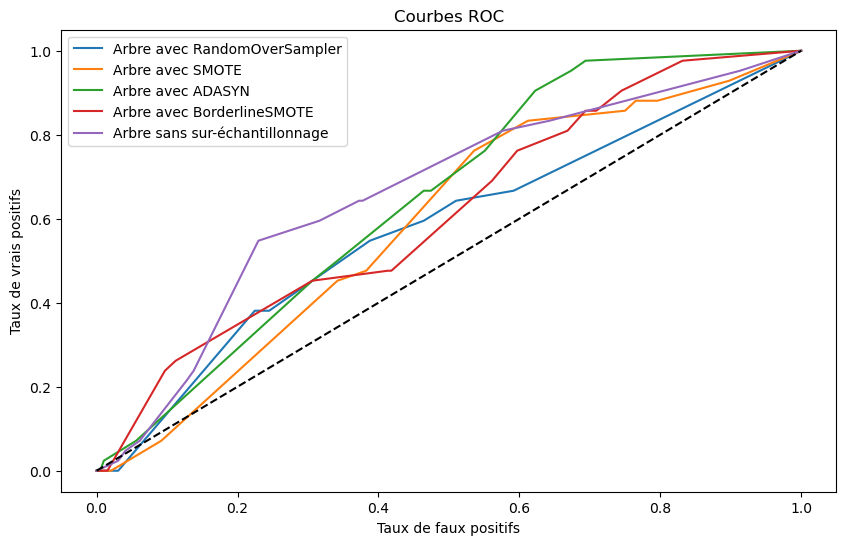

In [89]:
# Tracé des courbes ROC

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_arbre_oversampler, tpr_arbre_oversampler, _ = roc_curve(y_test, y_proba_arbre_oversampler)
fpr_arbre_smote, tpr_arbre_smote, _ = roc_curve(y_test, y_proba_arbre_smote)
fpr_arbre_adasyn, tpr_arbre_adasyn, _ = roc_curve(y_test, y_proba_arbre_adasyn)
fpr_arbre_bordeline_smote, tpr_arbre_bordeline_smote, _ = roc_curve(y_test, y_proba_arbre_bordeline_smote)
fpr_arbre, tpr_arbre, _ = roc_curve(y_test, y_proba_arbre)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler, tpr_arbre_oversampler, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote, tpr_arbre_smote, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn, tpr_arbre_adasyn, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_bordeline_smote, tpr_arbre_bordeline_smote, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre, tpr_arbre, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### C) Ajustement des hyperparamètres

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, cohen_kappa_score

# Définition de la grille des hyperparamètres pour l'arbre de décision
param_grid = {
    'arbre__criterion': ['gini', 'entropy', 'log_loss'], # Critère d'impureté 
    'arbre__max_depth': range(3, 32, 3),  # Tester les profondeurs de 3 à 31 par pas de 3, # Profondeur maximale de l'arbre
    'arbre__min_samples_split': [2, 5, 10, 20,30], # Nombre minimum d'échantillons pour diviser un nœud
    'arbre__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score), 
    'Kappa' : make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}


# Justification de l'optimisation des hyperparamètres

# max_depth : pour éviter l'overfitting, on cherche à limiter la profondeur de l'arbre
# Profondeur Minimale : 3 (pour permettre à l'arbre de commencer à capturer les interactions entre variables)
# Profondeur Maximale : Min(2 * nombre de variables utilisables, nombre total de variables), donc dans ce cas, min(2 * 31, 31) = 31. Cela suppose que chaque variable pourrait être utilisée au maximum deux fois dans le chemin le plus long, mais cela reste une heuristique.
# Pas : 3 ou 5 pour commencer, puis affiner en fonction des résultats obtenus.

In [91]:
# Ajustement des hyperparamètres 

grille_recherche_arbre_oversampler = GridSearchCV(modele_arbre_oversampler, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_arbre_smote = GridSearchCV(modele_arbre_smote, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_arbre_adasyn = GridSearchCV(modele_arbre_adasyn, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_arbre_bordeline_smote = GridSearchCV(modele_arbre_bordeline_smote, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_arbre = GridSearchCV(modele_arbre, param_grid, cv=5, scoring=scoring, refit='F1')

grille_recherche_arbre_oversampler.fit(X_train, y_train)
grille_recherche_arbre_smote.fit(X_train, y_train)
grille_recherche_arbre_adasyn.fit(X_train, y_train)
grille_recherche_arbre_bordeline_smote.fit(X_train, y_train)
grille_recherche_arbre.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Récupération des résultats

meilleur_score_arbre_oversampler = grille_recherche_arbre_oversampler.best_score_
meilleur_score_arbre_smote = grille_recherche_arbre_smote.best_score_
meilleur_score_arbre_adasyn = grille_recherche_arbre_adasyn.best_score_
meilleur_score_arbre_bordeline_smote = grille_recherche_arbre_bordeline_smote.best_score_
meilleur_score_arbre = grille_recherche_arbre.best_score_

meilleurs_parametres_arbre_oversampler = grille_recherche_arbre_oversampler.best_params_
meilleurs_parametres_arbre_smote = grille_recherche_arbre_smote.best_params_
meilleurs_parametres_arbre_adasyn = grille_recherche_arbre_adasyn.best_params_
meilleurs_parametres_arbre_bordeline_smote = grille_recherche_arbre_bordeline_smote.best_params_
meilleurs_parametres_arbre = grille_recherche_arbre.best_params_


In [ ]:
# Affichage des résultats

resultats_hyperparametres_arbre = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [meilleur_score_arbre, meilleurs_parametres_arbre],
    "Arbre de décision avec SMOTE": [meilleur_score_arbre_smote, meilleurs_parametres_arbre_smote],
    "Arbre de décision avec RandomOverSampler": [meilleur_score_arbre_oversampler, meilleurs_parametres_arbre_oversampler],
    "Arbre de décision avec ADASYN": [meilleur_score_arbre_adasyn, meilleurs_parametres_arbre_adasyn],
    "Arbre de décision avec BorderlineSMOTE": [meilleur_score_arbre_bordeline_smote, meilleurs_parametres_arbre_bordeline_smote]
    },
    index = ["Meilleur score", "Meilleurs paramètres"]
)

In [ ]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_arbre_oversampler_cv = grille_recherche_arbre_oversampler.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler_cv = grille_recherche_arbre_oversampler.predict(X_test)

y_proba_arbre_smote_cv = grille_recherche_arbre_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_smote_cv = grille_recherche_arbre_smote.predict(X_test)

y_proba_arbre_adasyn_cv = grille_recherche_arbre_adasyn.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn_cv = grille_recherche_arbre_adasyn.predict(X_test)

y_proba_arbre_bordeline_smote_cv = grille_recherche_arbre_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_bordeline_smote_cv = grille_recherche_arbre_bordeline_smote.predict(X_test)

y_proba_arbre_cv = grille_recherche_arbre.predict_proba(X_test)[:, 1]
y_pred_arbre_cv = grille_recherche_arbre.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [ ]:
# Mesure de la performance

# Calcul des métriques
auc_roc_arbre_oversampler_cv = roc_auc_score(y_test, y_proba_arbre_oversampler_cv)
auc_pr_arbre_oversampler_cv = average_precision_score(y_test, y_proba_arbre_oversampler_cv)
log_loss_value_arbre_oversampler_cv = log_loss(y_test, y_proba_arbre_oversampler_cv)
precision_arbre_oversampler_cv = precision_score(y_test, y_pred_arbre_oversampler_cv)
recall_arbre_oversampler_cv = recall_score(y_test, y_pred_arbre_oversampler_cv)
f1_arbre_oversampler_cv = f1_score(y_test, y_pred_arbre_oversampler_cv)
mcc_arbre_oversampler_cv = matthews_corrcoef(y_test, y_pred_arbre_oversampler_cv)
balanced_acc_arbre_oversampler_cv = balanced_accuracy_score(y_test, y_pred_arbre_oversampler_cv)
cohen_kappa_arbre_oversampler_cv = cohen_kappa_score(y_test, y_pred_arbre_oversampler_cv)

auc_roc_arbre_smote_cv = roc_auc_score(y_test, y_proba_arbre_smote_cv)
auc_pr_arbre_smote_cv = average_precision_score(y_test, y_proba_arbre_smote_cv)
log_loss_value_arbre_smote_cv = log_loss(y_test, y_proba_arbre_smote_cv)
precision_arbre_smote_cv = precision_score(y_test, y_pred_arbre_smote_cv)
recall_arbre_smote_cv = recall_score(y_test, y_pred_arbre_smote_cv)
f1_arbre_smote_cv = f1_score(y_test, y_pred_arbre_smote_cv)
mcc_arbre_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_smote_cv)
balanced_acc_arbre_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_smote_cv)
cohen_kappa_arbre_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_smote_cv)

auc_roc_arbre_adasyn_cv = roc_auc_score(y_test, y_proba_arbre_adasyn_cv)
auc_pr_arbre_adasyn_cv = average_precision_score(y_test, y_proba_arbre_adasyn_cv)
log_loss_value_arbre_adasyn_cv = log_loss(y_test, y_proba_arbre_adasyn_cv)
precision_arbre_adasyn_cv = precision_score(y_test, y_pred_arbre_adasyn_cv)
recall_arbre_adasyn_cv = recall_score(y_test, y_pred_arbre_adasyn_cv)
f1_arbre_adasyn_cv = f1_score(y_test, y_pred_arbre_adasyn_cv)
mcc_arbre_adasyn_cv = matthews_corrcoef(y_test, y_pred_arbre_adasyn_cv)
balanced_acc_arbre_adasyn_cv = balanced_accuracy_score(y_test, y_pred_arbre_adasyn_cv)
cohen_kappa_arbre_adasyn_cv = cohen_kappa_score(y_test, y_pred_arbre_adasyn_cv)

auc_roc_arbre_bordeline_smote_cv = roc_auc_score(y_test, y_proba_arbre_bordeline_smote_cv)
auc_pr_arbre_bordeline_smote_cv = average_precision_score(y_test, y_proba_arbre_bordeline_smote_cv)
log_loss_value_arbre_bordeline_smote_cv = log_loss(y_test, y_proba_arbre_bordeline_smote_cv)
precision_arbre_bordeline_smote_cv = precision_score(y_test, y_pred_arbre_bordeline_smote_cv)
recall_arbre_bordeline_smote_cv = recall_score(y_test, y_pred_arbre_bordeline_smote_cv)
f1_arbre_bordeline_smote_cv = f1_score(y_test, y_pred_arbre_bordeline_smote_cv)
mcc_arbre_bordeline_smote_cv = matthews_corrcoef(y_test, y_pred_arbre_bordeline_smote_cv)
balanced_acc_arbre_bordeline_smote_cv = balanced_accuracy_score(y_test, y_pred_arbre_bordeline_smote_cv)
cohens_kappa_arbre_bordeline_smote_cv = cohen_kappa_score(y_test, y_pred_arbre_bordeline_smote_cv)

auc_roc_arbre_cv = roc_auc_score(y_test, y_proba_arbre_cv)
auc_pr_arbre_cv = average_precision_score(y_test, y_proba_arbre_cv)
log_loss_value_arbre_cv = log_loss(y_test, y_proba_arbre_cv)
precision_arbre_cv = precision_score(y_test, y_pred_arbre_cv)
recall_arbre_cv = recall_score(y_test, y_pred_arbre_cv)
f1_arbre_cv = f1_score(y_test, y_pred_arbre_cv)
mcc_arbre_cv = matthews_corrcoef(y_test, y_pred_arbre_cv)
balanced_acc_arbre_cv = balanced_accuracy_score(y_test, y_pred_arbre_cv)
cohen_kappa_arbre_cv = cohen_kappa_score(y_test, y_pred_arbre_cv)

In [ ]:
# Affichage des résultats

resultats_arbres_cv = pd.DataFrame({
    "Arbre de décision sans sur-échantillonnage": [auc_roc_arbre_cv, auc_pr_arbre_cv, log_loss_value_arbre_cv, f1_arbre_cv, mcc_arbre_cv, balanced_acc_arbre_cv, specificity_arbre_cv, cohen_kappa_arbre_cv],
    "Arbre de décision avec SMOTE": [auc_roc_arbre_smote_cv, auc_pr_arbre_smote_cv, log_loss_value_arbre_smote_cv, f1_arbre_smote_cv, mcc_arbre_smote_cv, balanced_acc_arbre_smote_cv, specificity_arbre_smote_cv, cohen_kappa_arbre_smote_cv],
    "Arbre de décision avec RandomOverSampler": [auc_roc_arbre_oversampler_cv, auc_pr_arbre_oversampler_cv, log_loss_value_arbre_oversampler_cv, f1_arbre_oversampler_cv, mcc_arbre_oversampler_cv, balanced_acc_arbre_oversampler_cv, specificity_arbre_oversampler_cv, cohen_kappa_arbre_oversampler_cv],
    "Arbre de décision avec ADASYN": [auc_roc_arbre_adasyn_cv, auc_pr_arbre_adasyn_cv, log_loss_value_arbre_adasyn_cv, f1_arbre_adasyn_cv, mcc_arbre_adasyn_cv, balanced_acc_arbre_adasyn_cv, specificity_arbre_adasyn_cv, cohen_kappa_arbre_adasyn_cv],
    "Arbre de décision avec BorderlineSMOTE": [auc_roc_arbre_bordeline_smote_cv, auc_pr_arbre_bordeline_smote_cv, log_loss_value_arbre_bordeline_smote_cv, f1_arbre_bordeline_smote_cv, mcc_arbre_bordeline_smote_cv, balanced_acc_arbre_bordeline_smote_cv, specificity_arbre_bordeline_smote_cv, cohens_kappa_arbre_bordeline_smote_cv]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_arbres_cv = resultats_arbres_cv.round(3)

resultats_arbres_cv

In [ ]:
# Comparaison des courbes ROC

fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, _ = roc_curve(y_test, y_proba_arbre_oversampler_cv)
fpr_arbre_smote_cv, tpr_arbre_smote_cv, _ = roc_curve(y_test, y_proba_arbre_smote_cv)
fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, _ = roc_curve(y_test, y_proba_arbre_adasyn_cv)
fpr_arbre_bordeline_smote_cv, tpr_arbre_bordeline_smote_cv, _ = roc_curve(y_test, y_proba_arbre_bordeline_smote_cv)
fpr_arbre_cv, tpr_arbre_cv, _ = roc_curve(y_test, y_proba_arbre_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler_cv, tpr_arbre_oversampler_cv, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote_cv, tpr_arbre_smote_cv, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn_cv, tpr_arbre_adasyn_cv, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_bordeline_smote_cv, tpr_arbre_bordeline_smote_cv, label='Arbre avec BorderlineSMOTE')
plt.plot(fpr_arbre_cv, tpr_arbre_cv, label='Arbre sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### E) Importance des variables

In [ ]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_arbre_oversampler = modele_arbre_oversampler.named_steps['arbre'].feature_importances_
importances_arbre_smote = modele_arbre_smote.named_steps['arbre'].feature_importances_
importances_arbre_adasyn = modele_arbre_adasyn.named_steps['arbre'].feature_importances_
importances_arbre_bordeline_smote = modele_arbre_bordeline_smote.named_steps['arbre'].feature_importances_
importances_arbre = modele_arbre.named_steps['arbre'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_arbre_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_oversampler
})

resultats_importance_variables_arbre_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_smote
})

resultats_importance_variables_arbre_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_adasyn
})

resultats_importance_variables_arbre_bordeline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre_bordeline_smote
})

resultats_importance_variables_arbre = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_arbre
})

# Affichage des résultats
resultats_importance_variables_arbre_oversampler = resultats_importance_variables_arbre_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_smote = resultats_importance_variables_arbre_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_adasyn = resultats_importance_variables_arbre_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre_bordeline_smote = resultats_importance_variables_arbre_bordeline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_arbre = resultats_importance_variables_arbre.sort_values(by="Importance", ascending=False)

resultats_importance_variables_arbre_oversampler

In [ ]:
resultats_importance_variables_arbre_smote

In [ ]:
resultats_importance_variables_arbre_adasyn

In [ ]:
resultats_importance_variables_arbre_bordeline_smote

In [ ]:
resultats_importance_variables_arbre

In [ ]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_oversampler['Variable'], resultats_importance_variables_arbre_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_smote['Variable'], resultats_importance_variables_arbre_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_adasyn['Variable'], resultats_importance_variables_arbre_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre_bordeline_smote['Variable'], resultats_importance_variables_arbre_bordeline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_arbre['Variable'], resultats_importance_variables_arbre['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour l\'arbre sans sur-échantillonnage')
plt.show()

## I.2.4. Forêts Aléatoires 

### A) Construction des modèles

In [ ]:
# Construction du modèle de forêts aléatoires avec rééquilibrage des classes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

etapes_rf_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('arbre', RandomForestClassifier())
        ]

etapes_rf_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('arbre', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN()), # Sur-échantillonnage
        ('arbre', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf_bordeline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('bordeline_smote', BorderlineSMOTE()), # Sur-échantillonnage
        ('rf', RandomForestClassifier()), # Forets aléatoires
        ]

etapes_rf = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('rf', RandomForestClassifier()) # Forets aléatoires
        ]


modele_rf_oversampler = Pipeline(steps=etapes_rf_oversampler) # Création du pipeline
modele_rf_smote = Pipeline(steps=etapes_rf_smote) # Création du pipeline
modele_rf_adasyn = Pipeline(steps=etapes_rf_adasyn) # Création du pipeline
modele_rf_bordeline_smote = Pipeline(steps=etapes_rf_bordeline_smote) # Création du pipeline
modele_rf = Pipeline(steps=etapes_rf) # Création du pipeline

modele_rf_oversampler.fit(X_train, y_train) # Entraînement
modele_rf_smote.fit(X_train, y_train) # Entraînement
modele_rf_adasyn.fit(X_train, y_train) # Entraînement
modele_rf_bordeline_smote.fit(X_train, y_train) # Entraînement
modele_rf.fit(X_train, y_train) # Entraînement

In [ ]:
# Prédictions

y_proba_rf_oversampler = modele_rf_oversampler.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler = modele_rf_oversampler.predict(X_test)

y_proba_rf_smote = modele_rf_smote.predict_proba(X_test)[:, 1]
y_pred_rf_smote = modele_rf_smote.predict(X_test)

y_proba_rf_adasyn = modele_rf_adasyn.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn = modele_rf_adasyn.predict(X_test)

y_proba_rf_bordeline_smote = modele_rf_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_rf_bordeline_smote = modele_rf_bordeline_smote.predict(X_test)

y_proba_rf = modele_rf.predict_proba(X_test)[:, 1] 
y_pred_rf = modele_rf.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [ ]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_rf_oversampler = roc_auc_score(y_test, y_proba_rf_oversampler)
auc_pr_rf_oversampler = average_precision_score(y_test, y_proba_rf_oversampler)
log_loss_value_rf_oversampler = log_loss(y_test, y_proba_rf_oversampler)
precision_rf_oversampler = precision_score(y_test, y_pred_rf_oversampler)
recall_rf_oversampler = recall_score(y_test, y_pred_rf_oversampler)
f1_rf_oversampler = f1_score(y_test, y_pred_rf_oversampler)
mcc_rf_oversampler = matthews_corrcoef(y_test, y_pred_rf_oversampler)
balanced_acc_rf_oversampler = balanced_accuracy_score(y_test, y_pred_rf_oversampler)
specificity_rf_oversampler = confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_rf_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_rf_oversampler)[0, 1])
cohen_kappa_rf_oversampler = cohen_kappa_score(y_test, y_pred_rf_oversampler)

auc_roc_rf_smote = roc_auc_score(y_test, y_proba_rf_smote)
auc_pr_rf_smote = average_precision_score(y_test, y_proba_rf_smote)
log_loss_value_rf_smote = log_loss(y_test, y_proba_rf_smote)
precision_rf_smote = precision_score(y_test, y_pred_rf_smote)
recall_rf_smote = recall_score(y_test, y_pred_rf_smote)
f1_rf_smote = f1_score(y_test, y_pred_rf_smote)
mcc_rf_smote = matthews_corrcoef(y_test, y_pred_rf_smote)
balanced_acc_rf_smote = balanced_accuracy_score(y_test, y_pred_rf_smote)
specificity_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_smote)[0, 1])
cohen_kappa_rf_smote = cohen_kappa_score(y_test, y_pred_rf_smote)

auc_roc_rf_adasyn = roc_auc_score(y_test, y_proba_rf_adasyn)
auc_pr_rf_adasyn = average_precision_score(y_test, y_proba_rf_adasyn)
log_loss_value_rf_adasyn = log_loss(y_test, y_proba_rf_adasyn)
precision_rf_adasyn = precision_score(y_test, y_pred_rf_adasyn)
recall_rf_adasyn = recall_score(y_test, y_pred_rf_adasyn)
f1_rf_adasyn = f1_score(y_test, y_pred_rf_adasyn)
mcc_rf_adasyn = matthews_corrcoef(y_test, y_pred_rf_adasyn)
balanced_acc_rf_adasyn = balanced_accuracy_score(y_test, y_pred_rf_adasyn)
specificity_rf_adasyn = confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_rf_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_rf_adasyn)[0, 1])
cohen_kappa_rf_adasyn = cohen_kappa_score(y_test, y_pred_rf_adasyn)

auc_roc_rf_bordeline_smote = roc_auc_score(y_test, y_proba_rf_bordeline_smote)
auc_pr_rf_bordeline_smote = average_precision_score(y_test, y_proba_rf_bordeline_smote)
log_loss_value_rf_bordeline_smote = log_loss(y_test, y_proba_rf_bordeline_smote)
precision_rf_bordeline_smote = precision_score(y_test, y_pred_rf_bordeline_smote)
recall_rf_bordeline_smote = recall_score(y_test, y_pred_rf_bordeline_smote)
f1_rf_bordeline_smote = f1_score(y_test, y_pred_rf_bordeline_smote)
mcc_rf_bordeline_smote = matthews_corrcoef(y_test, y_pred_rf_bordeline_smote)
balanced_acc_rf_bordeline_smote = balanced_accuracy_score(y_test, y_pred_rf_bordeline_smote)
specificity_rf_bordeline_smote = confusion_matrix(y_test, y_pred_rf_bordeline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_rf_bordeline_smote)[0, 0] + confusion_matrix(y_test, y_pred_rf_bordeline_smote)[0, 1])
cohen_kappa_rf_bordeline_smote = cohen_kappa_score(y_test, y_pred_rf_bordeline_smote)

auc_roc_rf = roc_auc_score(y_test, y_proba_rf)
auc_pr_rf = average_precision_score(y_test, y_proba_rf)
log_loss_value_rf = log_loss(y_test, y_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
specificity_rf = confusion_matrix(y_test, y_pred_rf)[0, 0] / (confusion_matrix(y_test, y_pred_rf)[0, 0] + confusion_matrix(y_test, y_pred_rf)[0, 1])
cohen_kappa_rf = cohen_kappa_score(y_test, y_pred_rf)

In [ ]:
# Affichage des résultats

resultats_rf = pd.DataFrame({
    "Random Forest sans sur-échantillonnage": [auc_roc_rf, auc_pr_rf, log_loss_value_rf, f1_rf, mcc_rf, balanced_acc_rf, specificity_rf, cohen_kappa_rf],
    "Random Forest avec SMOTE": [auc_roc_rf_smote, auc_pr_rf_smote, log_loss_value_rf_smote, f1_rf_smote, mcc_rf_smote, balanced_acc_rf_smote, specificity_rf_smote, cohen_kappa_rf_smote],
    "Random Forest avec RandomOverSampler": [auc_roc_rf_oversampler, auc_pr_rf_oversampler, log_loss_value_rf_oversampler, f1_rf_oversampler, mcc_rf_oversampler, balanced_acc_rf_oversampler, specificity_rf_oversampler, cohen_kappa_rf_oversampler],
    "Random Forest avec ADASYN": [auc_roc_rf_adasyn, auc_pr_rf_adasyn, log_loss_value_rf_adasyn, f1_rf_adasyn, mcc_rf_adasyn, balanced_acc_rf_adasyn, specificity_rf_adasyn, cohen_kappa_rf_adasyn],
    "Random Forest avec BorderlineSMOTE": [auc_roc_rf_bordeline_smote, auc_pr_rf_bordeline_smote, log_loss_value_rf_bordeline_smote, f1_rf_bordeline_smote, mcc_rf_bordeline_smote, balanced_acc_rf_bordeline_smote, specificity_rf_bordeline_smote, cohen_kappa_rf_bordeline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf = resultats_rf.round(3)
resultats_rf

In [ ]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_rf_oversampler, tpr_rf_oversampler, _ = roc_curve(y_test, y_proba_rf_oversampler)
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_proba_rf_smote)
fpr_rf_adasyn, tpr_rf_adasyn, _ = roc_curve(y_test, y_proba_rf_adasyn)
fpr_rf_bordeline_smote, tpr_rf_bordeline_smote, _ = roc_curve(y_test, y_proba_rf_bordeline_smote)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler, tpr_rf_oversampler, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote, tpr_rf_smote, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn, tpr_rf_adasyn, label='RF avec ADASYN')
plt.plot(fpr_rf_bordeline_smote, tpr_rf_bordeline_smote, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf, tpr_rf, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### C) Ajustement des hyperparamètres

In [ ]:
# Ajustement des hyperparamètres par validation croisée

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

# Définition de la grille des hyperparamètres pour les forêts aléatoires

param_grid = {
    'rf__n_estimators': [100, 200, 300, 400, 500], # Nombre d'arbres
    'rf__criterion': ['gini', 'entropy'], # Critère d'impureté
    'rf__max_depth': range(3,32,3), # Profondeur maximale de l'arbre
    'rf__min_samples_split': [2, 5, 10, 20, 30], # Nombre minimum d'échantillons pour diviser un nœud
    'rf__min_samples_leaf': [1, 2, 4] # Nombre minimum d'échantillons requis à chaque feuille
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score), 
    'Kappa': make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}

In [ ]:
# Ajustement des hyperparamètres

grille_recherche_rf_oversampler = GridSearchCV(modele_rf_oversampler, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_rf_smote = GridSearchCV(modele_rf_smote, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_rf_adasyn = GridSearchCV(modele_rf_adasyn, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_rf_bordeline_smote = GridSearchCV(modele_rf_bordeline_smote, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_rf = GridSearchCV(modele_rf, param_grid, cv=5, scoring=scoring, refit='F1')

In [ ]:
# Entraînement des modèles

grille_recherche_rf_oversampler.fit(X_train, y_train)
grille_recherche_rf_smote.fit(X_train, y_train)
grille_recherche_rf_adasyn.fit(X_train, y_train)
grille_recherche_rf_bordeline_smote.fit(X_train, y_train)
grille_recherche_rf.fit(X_train, y_train)

In [ ]:
# Récupération des résultats

meilleur_score_rf_oversampler = grille_recherche_rf_oversampler.best_score_
meilleur_score_rf_smote = grille_recherche_rf_smote.best_score_
meilleur_score_rf_adasyn = grille_recherche_rf_adasyn.best_score_
meilleur_score_rf_bordeline_smote = grille_recherche_rf_bordeline_smote.best_score_
meilleur_score_rf = grille_recherche_rf.best_score_

meilleurs_parametres_rf_oversampler = grille_recherche_rf_oversampler.best_params_
meilleurs_parametres_rf_smote = grille_recherche_rf_smote.best_params_
meilleurs_parametres_rf_adasyn = grille_recherche_rf_adasyn.best_params_
meilleurs_parametres_rf_bordeline_smote = grille_recherche_rf_bordeline_smote.best_params_
meilleurs_parametres_rf = grille_recherche_rf.best_params_

# Affichage des résultats

resultats_hyperparametres_rf = pd.DataFrame({
    "Random Forest sans sur-échantillonnage": [meilleur_score_rf, meilleurs_parametres_rf],
    "Random Forest avec SMOTE": [meilleur_score_rf_smote, meilleurs_parametres_rf_smote],
    "Random Forest avec RandomOverSampler": [meilleur_score_rf_oversampler, meilleurs_parametres_rf_oversampler],
    "Random Forest avec ADASYN": [meilleur_score_rf_adasyn, meilleurs_parametres_rf_adasyn],
    "Random Forest avec BorderlineSMOTE": [meilleur_score_rf_bordeline_smote, meilleurs_parametres_rf_bordeline_smote]
    },
    index = ["Meilleur score", "Meilleurs paramètres"]
)

In [ ]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_rf_oversampler_cv = grille_recherche_rf_oversampler.predict_proba(X_test)[:, 1]
y_pred_rf_oversampler_cv = grille_recherche_rf_oversampler.predict(X_test)

y_proba_rf_smote_cv = grille_recherche_rf_smote.predict_proba(X_test)[:, 1]
y_pred_rf_smote_cv = grille_recherche_rf_smote.predict(X_test)

y_proba_rf_adasyn_cv = grille_recherche_rf_adasyn.predict_proba(X_test)[:, 1]
y_pred_rf_adasyn_cv = grille_recherche_rf_adasyn.predict(X_test)

y_proba_rf_bordeline_smote_cv = grille_recherche_rf_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_rf_bordeline_smote_cv = grille_recherche_rf_bordeline_smote.predict(X_test)

y_proba_rf_cv = grille_recherche_rf.predict_proba(X_test)[:, 1]
y_pred_rf_cv = grille_recherche_rf.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [ ]:
# Calcul des métriques

auc_roc_rf_oversampler_cv = roc_auc_score(y_test, y_proba_rf_oversampler_cv)
auc_pr_rf_oversampler_cv = average_precision_score(y_test, y_proba_rf_oversampler_cv)
log_loss_value_rf_oversampler_cv = log_loss(y_test, y_proba_rf_oversampler_cv)
precision_rf_oversampler_cv = precision_score(y_test, y_proba_rf_oversampler_cv)
recall_rf_oversampler_cv = recall_score(y_test, y_proba_rf_oversampler_cv)
f1_rf_oversampler_cv = f1_score(y_test, y_proba_rf_oversampler_cv)
mcc_rf_oversampler_cv = matthews_corrcoef(y_test, y_proba_rf_oversampler_cv)
balanced_acc_rf_oversampler_cv = balanced_accuracy_score(y_test, y_proba_rf_oversampler_cv)
cohen_kappa_rf_oversampler_cv = cohen_kappa_score(y_test, y_proba_rf_oversampler_cv)

auc_roc_rf_smote_cv = roc_auc_score(y_test, y_proba_rf_smote_cv)
auc_pr_rf_smote_cv = average_precision_score(y_test, y_proba_rf_smote_cv)
log_loss_value_rf_smote_cv = log_loss(y_test, y_proba_rf_smote_cv)
precision_rf_smote_cv = precision_score(y_test, y_proba_rf_smote_cv)
recall_rf_smote_cv = recall_score(y_test, y_proba_rf_smote_cv)
f1_rf_smote_cv = f1_score(y_test, y_proba_rf_smote_cv)
mcc_rf_smote_cv = matthews_corrcoef(y_test, y_proba_rf_smote_cv)
balanced_acc_rf_smote_cv = balanced_accuracy_score(y_test, y_proba_rf_smote_cv)
cohen_kappa_rf_smote_cv = cohen_kappa_score(y_test, y_proba_rf_smote_cv)

auc_roc_rf_adasyn_cv = roc_auc_score(y_test, y_proba_rf_adasyn_cv)
auc_pr_rf_adasyn_cv = average_precision_score(y_test, y_proba_rf_adasyn_cv)
log_loss_value_rf_adasyn_cv = log_loss(y_test, y_proba_rf_adasyn_cv)
precision_rf_adasyn_cv = precision_score(y_test, y_proba_rf_adasyn_cv)
recall_rf_adasyn_cv = recall_score(y_test, y_proba_rf_adasyn_cv)
f1_rf_adasyn_cv = f1_score(y_test, y_proba_rf_adasyn_cv)
mcc_rf_adasyn_cv = matthews_corrcoef(y_test, y_proba_rf_adasyn_cv)
balanced_acc_rf_adasyn_cv = balanced_accuracy_score(y_test, y_proba_rf_adasyn_cv)
cohen_kappa_rf_adasyn_cv = cohen_kappa_score(y_test, y_proba_rf_adasyn_cv)

auc_roc_rf_bordeline_smote_cv = roc_auc_score(y_test, y_proba_rf_bordeline_smote_cv)
auc_pr_rf_bordeline_smote_cv = average_precision_score(y_test, y_proba_rf_bordeline_smote_cv)
log_loss_value_rf_bordeline_smote_cv = log_loss(y_test, y_proba_rf_bordeline_smote_cv)
precision_rf_bordeline_smote_cv = precision_score(y_test, y_proba_rf_bordeline_smote_cv)
recall_rf_bordeline_smote_cv = recall_score(y_test, y_proba_rf_bordeline_smote_cv)
f1_rf_bordeline_smote_cv = f1_score(y_test, y_proba_rf_bordeline_smote_cv)
mcc_rf_bordeline_smote_cv = matthews_corrcoef(y_test, y_proba_rf_bordeline_smote_cv)
balanced_acc_rf_bordeline_smote_cv = balanced_accuracy_score(y_test, y_proba_rf_bordeline_smote_cv)
cohen_kappa_rf_bordeline_smote_cv = cohen_kappa_score(y_test, y_proba_rf_bordeline_smote_cv)

auc_roc_rf_cv = roc_auc_score(y_test, y_proba_rf_cv)
auc_pr_rf_cv = average_precision_score(y_test, y_proba_rf_cv)
log_loss_value_rf_cv = log_loss(y_test, y_proba_rf_cv)
precision_rf_cv = precision_score(y_test, y_proba_rf_cv)
recall_rf_cv = recall_score(y_test, y_proba_rf_cv)
f1_rf_cv = f1_score(y_test, y_proba_rf_cv)
mcc_rf_cv = matthews_corrcoef(y_test, y_proba_rf_cv)
balanced_acc_rf_cv = balanced_accuracy_score(y_test, y_proba_rf_cv)
cohen_kappa_rf_cv = cohen_kappa_score(y_test, y_proba_rf_cv)

In [ ]:
# Affichage des résultats

resultats_rf_cv = pd.DataFrame({
    "Random Forest sans sur-échantillonnage": [auc_roc_rf_cv, auc_pr_rf_cv, log_loss_value_rf_cv, f1_rf_cv, mcc_rf_cv, balanced_acc_rf_cv, specificity_rf_cv, cohen_kappa_rf_cv],
    "Random Forest avec SMOTE": [auc_roc_rf_smote_cv, auc_pr_rf_smote_cv, log_loss_value_rf_smote_cv, f1_rf_smote_cv, mcc_rf_smote_cv, balanced_acc_rf_smote_cv, specificity_rf_smote_cv, cohen_kappa_rf_smote_cv],
    "Random Forest avec RandomOverSampler": [auc_roc_rf_oversampler_cv, auc_pr_rf_oversampler_cv, log_loss_value_rf_oversampler_cv, f1_rf_oversampler_cv, mcc_rf_oversampler_cv, balanced_acc_rf_oversampler_cv, specificity_rf_oversampler_cv, cohen_kappa_rf_oversampler_cv],
    "Random Forest avec ADASYN": [auc_roc_rf_adasyn_cv, auc_pr_rf_adasyn_cv, log_loss_value_rf_adasyn_cv, f1_rf_adasyn_cv, mcc_rf_adasyn_cv, balanced_acc_rf_adasyn_cv, specificity_rf_adasyn_cv, cohen_kappa_rf_adasyn_cv],
    "Random Forest avec BorderlineSMOTE": [auc_roc_rf_bordeline_smote_cv, auc_pr_rf_bordeline_smote_cv, log_loss_value_rf_bordeline_smote_cv, f1_rf_bordeline_smote_cv, mcc_rf_bordeline_smote_cv, balanced_acc_rf_bordeline_smote_cv, specificity_rf_bordeline_smote_cv, cohen_kappa_rf_bordeline_smote_cv]
})

# Arrondir les résultats à 3 chiffres après la virgule
resultats_rf_cv = resultats_rf_cv.round(3)
resultats_rf_cv

In [ ]:
# Comparaison des courbes ROC

fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, _ = roc_curve(y_test, y_proba_rf_oversampler_cv)
fpr_rf_smote_cv, tpr_rf_smote_cv, _ = roc_curve(y_test, y_proba_rf_smote_cv)
fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, _ = roc_curve(y_test, y_proba_rf_adasyn_cv)
fpr_rf_bordeline_smote_cv, tpr_rf_bordeline_smote_cv, _ = roc_curve(y_test, y_proba_rf_bordeline_smote_cv)
fpr_rf_cv, tpr_rf_cv, _ = roc_curve(y_test, y_proba_rf_cv)


plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_oversampler_cv, tpr_rf_oversampler_cv, label='RF avec RandomOverSampler')
plt.plot(fpr_rf_smote_cv, tpr_rf_smote_cv, label='RF avec SMOTE')
plt.plot(fpr_rf_adasyn_cv, tpr_rf_adasyn_cv, label='RF avec ADASYN')
plt.plot(fpr_rf_bordeline_smote_cv, tpr_rf_bordeline_smote_cv, label='RF avec BorderlineSMOTE')
plt.plot(fpr_rf_cv, tpr_rf_cv, label='RF sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()


### E) Importance des variables

In [ ]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importance_rf_oversampler = grille_recherche_rf_oversampler.best_estimator_.named_steps['arbre'].feature_importances_
importance_rf_smote = grille_recherche_rf_smote.best_estimator_.named_steps['arbre'].feature_importances_
importance_rf_adasyn = grille_recherche_rf_adasyn.best_estimator_.named_steps['arbre'].feature_importances_
importance_rf_bordeline_smote = grille_recherche_rf_bordeline_smote.best_estimator_.named_steps['arbre'].feature_importances_
importance_rf = grille_recherche_rf.best_estimator_.named_steps['rf'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_rf_oversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_rf_oversampler
})

resultats_importance_variables_rf_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_rf_smote
})

resultats_importance_variables_rf_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_rf_adasyn
})

resultats_importance_variables_rf_bordeline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_rf_bordeline_smote
})

resultats_importance_variables_rf = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_rf
})

# Affichage des résultats
resultats_importance_variables_rf_oversampler = resultats_importance_variables_rf_oversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_smote = resultats_importance_variables_rf_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_adasyn = resultats_importance_variables_rf_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf_bordeline_smote = resultats_importance_variables_rf_bordeline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_rf = resultats_importance_variables_rf.sort_values(by="Importance", ascending=False)

resultats_importance_variables_rf_oversampler

In [ ]:
resultats_importance_variables_rf_smote

In [ ]:
resultats_importance_variables_rf_adasyn

In [ ]:
resultats_importance_variables_rf_bordeline_smote

In [ ]:
resultats_importance_variables_rf

In [ ]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_oversampler['Variable'], resultats_importance_variables_rf_oversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_smote['Variable'], resultats_importance_variables_rf_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_adasyn['Variable'], resultats_importance_variables_rf_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf_bordeline_smote['Variable'], resultats_importance_variables_rf_bordeline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_rf['Variable'], resultats_importance_variables_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le RF sans sur-échantillonage')
plt.show()

## I.2.4. Gradient Boosting

### A) Construction des modèles

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Construction des étapes
etapes_gb_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN()), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb_bordeline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('bordeline_smote', BorderlineSMOTE()), # Sur-échantillonnage
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

etapes_gb = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('gb', GradientBoostingClassifier()) # Gradient Boosting
        ]

modele_gb_randomoversampler = Pipeline(steps=etapes_gb_randomoversampler) # Création du pipeline
modele_gb_smote = Pipeline(steps=etapes_gb_smote) # Création du pipeline
modele_gb_adasyn = Pipeline(steps=etapes_gb_adasyn) # Création du pipeline
modele_gb_bordeline_smote = Pipeline(steps=etapes_gb_bordeline_smote) # Création du pipeline
modele_gb = Pipeline(steps=etapes_gb) # Création du pipeline

In [ ]:
# Entraînement des modèles
modele_gb_randomoversampler.fit(X_train, y_train) # Entraînement
modele_gb_smote.fit(X_train, y_train) # Entraînement
modele_gb_adasyn.fit(X_train, y_train) # Entraînement
modele_gb_bordeline_smote.fit(X_train, y_train) # Entraînement
modele_gb.fit(X_train, y_train) 

In [ ]:
# Prédictions

y_proba_gb_randomoversampler = modele_gb_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler = modele_gb_randomoversampler.predict(X_test)

y_proba_gb_smote = modele_gb_smote.predict_proba(X_test)[:, 1]
y_pred_gb_smote = modele_gb_smote.predict(X_test)

y_proba_gb_adasyn = modele_gb_adasyn.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn = modele_gb_adasyn.predict(X_test)

y_proba_gb_bordeline_smote = modele_gb_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_gb_bordeline_smote = modele_gb_bordeline_smote.predict(X_test)

y_proba_gb = modele_gb.predict_proba(X_test)[:, 1]
y_pred_gb = modele_gb.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [ ]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

auc_roc_gb_randomoversampler = roc_auc_score(y_test, y_proba_gb_randomoversampler)
auc_pr_gb_randomoversampler = average_precision_score(y_test, y_proba_gb_randomoversampler)
log_loss_value_gb_randomoversampler = log_loss(y_test, y_proba_gb_randomoversampler)
precision_gb_randomoversampler = precision_score(y_test, y_pred_gb_randomoversampler)
recall_gb_randomoversampler = recall_score(y_test, y_pred_gb_randomoversampler)
f1_gb_randomoversampler = f1_score(y_test, y_pred_gb_randomoversampler)
mcc_gb_randomoversampler = matthews_corrcoef(y_test, y_pred_gb_randomoversampler)
balanced_acc_gb_randomoversampler = balanced_accuracy_score(y_test, y_pred_gb_randomoversampler)
specificity_gb_randomoversampler = confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_gb_randomoversampler)[0, 1])
cohen_kappa_gb_randomoversampler = cohen_kappa_score(y_test, y_pred_gb_randomoversampler)

auc_roc_gb_smote = roc_auc_score(y_test, y_proba_gb_smote)
auc_pr_gb_smote = average_precision_score(y_test, y_proba_gb_smote)
log_loss_value_gb_smote = log_loss(y_test, y_proba_gb_smote)
precision_gb_smote = precision_score(y_test, y_pred_gb_smote)
recall_gb_smote = recall_score(y_test, y_pred_gb_smote)
f1_gb_smote = f1_score(y_test, y_pred_gb_smote)
mcc_gb_smote = matthews_corrcoef(y_test, y_pred_gb_smote)
balanced_acc_gb_smote = balanced_accuracy_score(y_test, y_pred_gb_smote)
specificity_gb_smote = confusion_matrix(y_test, y_pred_gb_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_smote)[0, 1])
cohen_kappa_gb_smote = cohen_kappa_score(y_test, y_pred_gb_smote)

auc_roc_gb_adasyn = roc_auc_score(y_test, y_proba_gb_adasyn)
auc_pr_gb_adasyn = average_precision_score(y_test, y_proba_gb_adasyn)
log_loss_value_gb_adasyn = log_loss(y_test, y_proba_gb_adasyn)
precision_gb_adasyn = precision_score(y_test, y_pred_gb_adasyn)
recall_gb_adasyn = recall_score(y_test, y_pred_gb_adasyn)
f1_gb_adasyn = f1_score(y_test, y_pred_gb_adasyn)
mcc_gb_adasyn = matthews_corrcoef(y_test, y_pred_gb_adasyn)
balanced_acc_gb_adasyn = balanced_accuracy_score(y_test, y_pred_gb_adasyn)
specificity_gb_adasyn = confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_gb_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_gb_adasyn)[0, 1])
cohen_kappa_gb_adasyn = cohen_kappa_score(y_test, y_pred_gb_adasyn)

auc_roc_gb_bordeline_smote = roc_auc_score(y_test, y_proba_gb_bordeline_smote)
auc_pr_gb_bordeline_smote = average_precision_score(y_test, y_proba_gb_bordeline_smote)
log_loss_value_gb_bordeline_smote = log_loss(y_test, y_proba_gb_bordeline_smote)
precision_gb_bordeline_smote = precision_score(y_test, y_pred_gb_bordeline_smote)
recall_gb_bordeline_smote = recall_score(y_test, y_pred_gb_bordeline_smote)
f1_gb_bordeline_smote = f1_score(y_test, y_pred_gb_bordeline_smote)
mcc_gb_bordeline_smote = matthews_corrcoef(y_test, y_pred_gb_bordeline_smote)
balanced_acc_gb_bordeline_smote = balanced_accuracy_score(y_test, y_pred_gb_bordeline_smote)
specificity_gb_bordeline_smote = confusion_matrix(y_test, y_pred_gb_bordeline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_gb_bordeline_smote)[0, 0] + confusion_matrix(y_test, y_pred_gb_bordeline_smote)[0, 1])
cohen_kappa_gb_bordeline_smote = cohen_kappa_score(y_test, y_pred_gb_bordeline_smote)

auc_roc_gb = roc_auc_score(y_test, y_proba_gb)
auc_pr_gb = average_precision_score(y_test, y_proba_gb)
log_loss_value_gb = log_loss(y_test, y_proba_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
mcc_gb = matthews_corrcoef(y_test, y_pred_gb)
balanced_acc_gb = balanced_accuracy_score(y_test, y_pred_gb)
specificity_gb = confusion_matrix(y_test, y_pred_gb)[0, 0] / (confusion_matrix(y_test, y_pred_gb)[0, 0] + confusion_matrix(y_test, y_pred_gb)[0, 1])
cohen_kappa_gb = cohen_kappa_score(y_test, y_pred_gb)

In [ ]:
# Affichage des résultats
resultats_gb = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb, auc_pr_gb, log_loss_value_gb, f1_gb, mcc_gb, balanced_acc_gb, specificity_gb, cohen_kappa_gb],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote, auc_pr_gb_smote, log_loss_value_gb_smote, f1_gb_smote, mcc_gb_smote, balanced_acc_gb_smote, specificity_gb_smote, cohen_kappa_gb_smote],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler, auc_pr_gb_randomoversampler, log_loss_value_gb_randomoversampler, f1_gb_randomoversampler, mcc_gb_randomoversampler, balanced_acc_gb_randomoversampler, specificity_gb_randomoversampler, cohen_kappa_gb_randomoversampler],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn, auc_pr_gb_adasyn, log_loss_value_gb_adasyn, f1_gb_adasyn, mcc_gb_adasyn, balanced_acc_gb_adasyn, specificity_gb_adasyn, cohen_kappa_gb_adasyn],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_bordeline_smote, auc_pr_gb_bordeline_smote, log_loss_value_gb_bordeline_smote, f1_gb_bordeline_smote, mcc_gb_bordeline_smote, balanced_acc_gb_bordeline_smote, specificity_gb_bordeline_smote, cohen_kappa_gb_bordeline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb = resultats_gb.round(3)
resultats_gb

In [ ]:
# Courbes ROC

from sklearn.metrics import roc_curve

fpr_gb_randomoversampler, tpr_gb_randomoversampler, _ = roc_curve(y_test, y_proba_gb_randomoversampler)
fpr_gb_smote, tpr_gb_smote, _ = roc_curve(y_test, y_proba_gb_smote)
fpr_gb_adasyn, tpr_gb_adasyn, _ = roc_curve(y_test, y_proba_gb_adasyn)
fpr_gb_bordeline_smote, tpr_gb_bordeline_smote, _ = roc_curve(y_test, y_proba_gb_bordeline_smote)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler, tpr_gb_randomoversampler, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote, tpr_gb_smote, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn, tpr_gb_adasyn, label='GB avec ADASYN')
plt.plot(fpr_gb_bordeline_smote, tpr_gb_bordeline_smote, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb, tpr_gb, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### C) Ajustement des hyperparamètres

In [ ]:
# Ajustement des hyperparamètres par validation croisée

from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres pour le gradient boosting

param_grid = {
    'gb__n_estimators': [100, 200, 300, 400, 500], # Nombre d'arbres
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
    'gb__max_depth': [3, 5, 7, 9], # Profondeur maximale de l'arbre
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score), 
    'Kappa': make_scorer(cohen_kappa_score),
    'AUC': 'roc_auc'
}


In [ ]:
# Ajustement des hyperparamètres

grille_recherche_gb_randomoversampler = GridSearchCV(modele_gb_randomoversampler, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_gb_smote = GridSearchCV(modele_gb_smote, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_gb_adasyn = GridSearchCV(modele_gb_adasyn, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_gb_bordeline_smote = GridSearchCV(modele_gb_bordeline_smote, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_gb = GridSearchCV(modele_gb, param_grid, cv=5, scoring=scoring, refit='F1')

In [ ]:
# Entraînement des modèles

grille_recherche_gb_randomoversampler.fit(X_train, y_train)
grille_recherche_gb_smote.fit(X_train, y_train)
grille_recherche_gb_adasyn.fit(X_train, y_train)
grille_recherche_gb_bordeline_smote.fit(X_train, y_train)
grille_recherche_gb.fit(X_train, y_train)

In [ ]:
# Récupération des résultats

meilleur_score_gb_randomoversampler = grille_recherche_gb_randomoversampler.best_score_
meilleur_score_gb_smote = grille_recherche_gb_smote.best_score_
meilleur_score_gb_adasyn = grille_recherche_gb_adasyn.best_score_
meilleur_score_gb_bordeline_smote = grille_recherche_gb_bordeline_smote.best_score_
meilleur_score_gb = grille_recherche_gb.best_score_

meilleurs_parametres_gb_randomoversampler = grille_recherche_gb_randomoversampler.best_params_
meilleurs_parametres_gb_smote = grille_recherche_gb_smote.best_params_
meilleurs_parametres_gb_adasyn = grille_recherche_gb_adasyn.best_params_
meilleurs_parametres_gb_bordeline_smote = grille_recherche_gb_bordeline_smote.best_params_
meilleurs_parametres_gb = grille_recherche_gb.best_params_

# Affichage des résultats

resultats_hyperparametres_gb = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [meilleur_score_gb, meilleurs_parametres_gb],
    "Gradient Boosting avec SMOTE": [meilleur_score_gb_smote, meilleurs_parametres_gb_smote],
    "Gradient Boosting avec RandomOverSampler": [meilleur_score_gb_randomoversampler, meilleurs_parametres_gb_randomoversampler],
    "Gradient Boosting avec ADASYN": [meilleur_score_gb_adasyn, meilleurs_parametres_gb_adasyn],
    "Gradient Boosting avec BorderlineSMOTE": [meilleur_score_gb_bordeline_smote, meilleurs_parametres_gb_bordeline_smote]
    },
    index = ["Meilleur score", "Meilleurs paramètres"]
)

In [ ]:
# Prédictions avec les meilleurs hyperparamètres

y_proba_gb_randomoversampler_cv = grille_recherche_gb_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_gb_randomoversampler_cv = grille_recherche_gb_randomoversampler.predict(X_test)

y_proba_gb_smote_cv = grille_recherche_gb_smote.predict_proba(X_test)[:, 1]
y_pred_gb_smote_cv = grille_recherche_gb_smote.predict(X_test)

y_proba_gb_adasyn_cv = grille_recherche_gb_adasyn.predict_proba(X_test)[:, 1]
y_pred_gb_adasyn_cv = grille_recherche_gb_adasyn.predict(X_test)

y_proba_gb_bordeline_smote_cv = grille_recherche_gb_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_gb_bordeline_smote_cv = grille_recherche_gb_bordeline_smote.predict(X_test)

y_proba_gb_cv = grille_recherche_gb.predict_proba(X_test)[:, 1]
y_pred_gb_cv = grille_recherche_gb.predict(X_test)

### D) Mesure de la performance des modèles optimisés

In [ ]:
# Calcul des métriques

auc_roc_gb_randomoversampler_cv = roc_auc_score(y_test, y_proba_gb_randomoversampler_cv)
auc_pr_gb_randomoversampler_cv = average_precision_score(y_test, y_proba_gb_randomoversampler_cv)
log_loss_value_gb_randomoversampler_cv = log_loss(y_test, y_proba_gb_randomoversampler_cv)
precision_gb_randomoversampler_cv = precision_score(y_test, y_proba_gb_randomoversampler_cv)
recall_gb_randomoversampler_cv = recall_score(y_test, y_proba_gb_randomoversampler_cv)
f1_gb_randomoversampler_cv = f1_score(y_test, y_proba_gb_randomoversampler_cv)
mcc_gb_randomoversampler_cv = matthews_corrcoef(y_test, y_proba_gb_randomoversampler_cv)
balanced_acc_gb_randomoversampler_cv = balanced_accuracy_score(y_test, y_proba_gb_randomoversampler_cv)
cohen_kappa_gb_randomoversampler_cv = cohen_kappa_score(y_test, y_proba_gb_randomoversampler_cv)

auc_roc_gb_smote_cv = roc_auc_score(y_test, y_proba_gb_smote_cv)
auc_pr_gb_smote_cv = average_precision_score(y_test, y_proba_gb_smote_cv)
log_loss_value_gb_smote_cv = log_loss(y_test, y_proba_gb_smote_cv)
precision_gb_smote_cv = precision_score(y_test, y_proba_gb_smote_cv)
recall_gb_smote_cv = recall_score(y_test, y_proba_gb_smote_cv)
f1_gb_smote_cv = f1_score(y_test, y_proba_gb_smote_cv)
mcc_gb_smote_cv = matthews_corrcoef(y_test, y_proba_gb_smote_cv)
balanced_acc_gb_smote_cv = balanced_accuracy_score(y_test, y_proba_gb_smote_cv)
cohen_kappa_gb_smote_cv = cohen_kappa_score(y_test, y_proba_gb_smote_cv)

auc_roc_gb_adasyn_cv = roc_auc_score(y_test, y_proba_gb_adasyn_cv)
auc_pr_gb_adasyn_cv = average_precision_score(y_test, y_proba_gb_adasyn_cv)
log_loss_value_gb_adasyn_cv = log_loss(y_test, y_proba_gb_adasyn_cv)
precision_gb_adasyn_cv = precision_score(y_test, y_proba_gb_adasyn_cv)
recall_gb_adasyn_cv = recall_score(y_test, y_proba_gb_adasyn_cv)
f1_gb_adasyn_cv = f1_score(y_test, y_proba_gb_adasyn_cv)
mcc_gb_adasyn_cv = matthews_corrcoef(y_test, y_proba_gb_adasyn_cv)
balanced_acc_gb_adasyn_cv = balanced_accuracy_score(y_test, y_proba_gb_adasyn_cv)
cohen_kappa_gb_adasyn_cv = cohen_kappa_score(y_test, y_proba_gb_adasyn_cv)

auc_roc_gb_bordeline_smote_cv = roc_auc_score(y_test, y_proba_gb_bordeline_smote_cv)
auc_pr_gb_bordeline_smote_cv = average_precision_score(y_test, y_proba_gb_bordeline_smote_cv)
log_loss_value_gb_bordeline_smote_cv = log_loss(y_test, y_proba_gb_bordeline_smote_cv)
precision_gb_bordeline_smote_cv = precision_score(y_test, y_proba_gb_bordeline_smote_cv)
recall_gb_bordeline_smote_cv = recall_score(y_test, y_proba_gb_bordeline_smote_cv)
f1_gb_bordeline_smote_cv = f1_score(y_test, y_proba_gb_bordeline_smote_cv)
mcc_gb_bordeline_smote_cv = matthews_corrcoef(y_test, y_proba_gb_bordeline_smote_cv)
balanced_acc_gb_bordeline_smote_cv = balanced_accuracy_score(y_test, y_proba_gb_bordeline_smote_cv)
cohen_kappa_gb_bordeline_smote_cv = cohen_kappa_score(y_test, y_proba_gb_bordeline_smote_cv)

auc_roc_gb_cv = roc_auc_score(y_test, y_proba_gb_cv)
auc_pr_gb_cv = average_precision_score(y_test, y_proba_gb_cv)
log_loss_value_gb_cv = log_loss(y_test, y_proba_gb_cv)
precision_gb_cv = precision_score(y_test, y_proba_gb_cv)
recall_gb_cv = recall_score(y_test, y_proba_gb_cv)
f1_gb_cv = f1_score(y_test, y_proba_gb_cv)
mcc_gb_cv = matthews_corrcoef(y_test, y_proba_gb_cv)
balanced_acc_gb_cv = balanced_accuracy_score(y_test, y_proba_gb_cv)
cohen_kappa_gb_cv = cohen_kappa_score(y_test, y_proba_gb_cv)

In [ ]:
# Affichage des résultats

resultats_gb_cv = pd.DataFrame({
    "Gradient Boosting sans sur-échantillonnage": [auc_roc_gb_cv, auc_pr_gb_cv, log_loss_value_gb_cv, f1_gb_cv, mcc_gb_cv, balanced_acc_gb_cv, specificity_gb_cv, cohen_kappa_gb_cv],
    "Gradient Boosting avec SMOTE": [auc_roc_gb_smote_cv, auc_pr_gb_smote_cv, log_loss_value_gb_smote_cv, f1_gb_smote_cv, mcc_gb_smote_cv, balanced_acc_gb_smote_cv, specificity_gb_smote_cv, cohen_kappa_gb_smote_cv],
    "Gradient Boosting avec RandomOverSampler": [auc_roc_gb_randomoversampler_cv, auc_pr_gb_randomoversampler_cv, log_loss_value_gb_randomoversampler_cv, f1_gb_randomoversampler_cv, mcc_gb_randomoversampler_cv, balanced_acc_gb_randomoversampler_cv, specificity_gb_randomoversampler_cv, cohen_kappa_gb_randomoversampler_cv],
    "Gradient Boosting avec ADASYN": [auc_roc_gb_adasyn_cv, auc_pr_gb_adasyn_cv, log_loss_value_gb_adasyn_cv, f1_gb_adasyn_cv, mcc_gb_adasyn_cv, balanced_acc_gb_adasyn_cv, specificity_gb_adasyn_cv, cohen_kappa_gb_adasyn_cv],
    "Gradient Boosting avec BorderlineSMOTE": [auc_roc_gb_bordeline_smote_cv, auc_pr_gb_bordeline_smote_cv, log_loss_value_gb_bordeline_smote_cv, f1_gb_bordeline_smote_cv, mcc_gb_bordeline_smote_cv, balanced_acc_gb_bordeline_smote_cv, specificity_gb_bordeline_smote_cv, cohen_kappa_gb_bordeline_smote_cv]
})

# Arrondir les résultats à 3 chiffres après la virgule
resultats_gb_cv = resultats_gb_cv.round(3)
resultats_gb_cv

In [ ]:
# Courbes ROC

fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, _ = roc_curve(y_test, y_proba_gb_randomoversampler_cv)
fpr_gb_smote_cv, tpr_gb_smote_cv, _ = roc_curve(y_test, y_proba_gb_smote_cv)
fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, _ = roc_curve(y_test, y_proba_gb_adasyn_cv)
fpr_gb_bordeline_smote_cv, tpr_gb_bordeline_smote_cv, _ = roc_curve(y_test, y_proba_gb_bordeline_smote_cv)
fpr_gb_cv, tpr_gb_cv, _ = roc_curve(y_test, y_proba_gb_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_randomoversampler_cv, tpr_gb_randomoversampler_cv, label='GB avec RandomOverSampler')
plt.plot(fpr_gb_smote_cv, tpr_gb_smote_cv, label='GB avec SMOTE')
plt.plot(fpr_gb_adasyn_cv, tpr_gb_adasyn_cv, label='GB avec ADASYN')
plt.plot(fpr_gb_bordeline_smote_cv, tpr_gb_bordeline_smote_cv, label='GB avec BorderlineSMOTE')
plt.plot(fpr_gb_cv, tpr_gb_cv, label='GB sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### E) Importance des variables

In [ ]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_gb_randomoversampler = grille_recherche_gb_randomoversampler.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_smote = grille_recherche_gb_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_adasyn = grille_recherche_gb_adasyn.best_estimator_.named_steps['gb'].feature_importances_
importances_gb_bordeline_smote = grille_recherche_gb_bordeline_smote.best_estimator_.named_steps['gb'].feature_importances_
importances_gb = grille_recherche_gb.best_estimator_.named_steps['gb'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_gb_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_randomoversampler
})

resultats_importance_variables_gb_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_smote
})

resultats_importance_variables_gb_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_adasyn
})

resultats_importance_variables_gb_bordeline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb_bordeline_smote
})

resultats_importance_variables_gb = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_gb
})

# Affichage des résultats
resultats_importance_variables_gb_randomoversampler = resultats_importance_variables_gb_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_smote = resultats_importance_variables_gb_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_adasyn = resultats_importance_variables_gb_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_gb_bordeline_smote = resultats_importance_variables_gb_bordeline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_gb = resultats_importance_gb.sort_values(by="Importance", ascending=False)

resultats_importance_variables_gb_randomoversampler

In [ ]:
resultats_importance_variables_gb_smote

In [ ]:
resultats_importance_variables_gb_adasyn

In [ ]:
resultats_importance_variables_gb_adasyn

In [ ]:
resultats_importance_variables_gb

In [ ]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_randomoversampler['Variable'], resultats_importance_variables_gb_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_smote['Variable'], resultats_importance_variables_gb_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_adasyn['Variable'], resultats_importance_variables_gb_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb_bordeline_smote['Variable'], resultats_importance_variables_gb_bordeline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_gb['Variable'], resultats_importance_variables_gb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le GB sans sur-échantillonage')
plt.show()

## I.2.5. Adaboost

### A) Construction des modèles

In [ ]:
# Construction des modèles
from sklearn.ensemble import AdaBoostClassifier

etapes_adaboost_randomoversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN()), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost_bordeline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('bordeline_smote', BorderlineSMOTE()), # Sur-échantillonnage
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

etapes_adaboost = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adaboost', AdaBoostClassifier()) # AdaBoost
        ]

modele_adaboost_randomoversampler = Pipeline(steps=etapes_adaboost_randomoversampler) # Création du pipeline
modele_adaboost_smote = Pipeline(steps=etapes_adaboost_smote) # Création du pipeline
modele_adaboost_adasyn = Pipeline(steps=etapes_adaboost_adasyn) # Création du pipeline
modele_adaboost_bordeline_smote = Pipeline(steps=etapes_adaboost_bordeline_smote) # Création du pipeline
modele_adaboost = Pipeline(steps=etapes_adaboost) # Création du pipeline

In [ ]:
modele_adaboost_randomoversampler.fit(X_train, y_train) # Entraînement
modele_adaboost_smote.fit(X_train, y_train) # Entraînement
modele_adaboost_adasyn.fit(X_train, y_train) # Entraînement
modele_adaboost_bordeline_smote.fit(X_train, y_train) # Entraînement
modele_adaboost.fit(X_train, y_train) # Entraînement

In [ ]:
# Prédictions

y_proba_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler = modele_adaboost_randomoversampler.predict(X_test)

y_proba_adaboost_smote = modele_adaboost_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote = modele_adaboost_smote.predict(X_test)

y_proba_adaboost_adasyn = modele_adaboost_adasyn.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn = modele_adaboost_adasyn.predict(X_test)

y_proba_adaboost_bordeline_smote = modele_adaboost_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_bordeline_smote = modele_adaboost_bordeline_smote.predict(X_test)

y_proba_adaboost = modele_adaboost.predict_proba(X_test)[:, 1]
y_pred_adaboost = modele_adaboost.predict(X_test)

### B) Mesure de la performance des modèles initiaux

In [ ]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler = roc_auc_score(y_test, y_proba_adaboost_randomoversampler)
auc_pr_adaboost_randomoversampler = average_precision_score(y_test, y_proba_adaboost_randomoversampler)
log_loss_value_adaboost_randomoversampler = log_loss(y_test, y_proba_adaboost_randomoversampler)
precision_adaboost_randomoversampler = precision_score(y_test, y_pred_adaboost_randomoversampler)
recall_adaboost_randomoversampler = recall_score(y_test, y_pred_adaboost_randomoversampler)
f1_adaboost_randomoversampler = f1_score(y_test, y_pred_adaboost_randomoversampler)
mcc_adaboost_randomoversampler = matthews_corrcoef(y_test, y_pred_adaboost_randomoversampler)
balanced_acc_adaboost_randomoversampler = balanced_accuracy_score(y_test, y_pred_adaboost_randomoversampler)
specificity_adaboost_randomoversampler = confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_randomoversampler)[0, 1])
cohen_kappa_adaboost_randomoversampler = cohen_kappa_score(y_test, y_pred_adaboost_randomoversampler)

auc_roc_adaboost_smote = roc_auc_score(y_test, y_proba_adaboost_smote)
auc_pr_adaboost_smote = average_precision_score(y_test, y_proba_adaboost_smote)
log_loss_value_adaboost_smote = log_loss(y_test, y_proba_adaboost_smote)
precision_adaboost_smote = precision_score(y_test, y_pred_adaboost_smote)
recall_adaboost_smote = recall_score(y_test, y_pred_adaboost_smote)
f1_adaboost_smote = f1_score(y_test, y_pred_adaboost_smote)
mcc_adaboost_smote = matthews_corrcoef(y_test, y_pred_adaboost_smote)
balanced_acc_adaboost_smote = balanced_accuracy_score(y_test, y_pred_adaboost_smote)
specificity_adaboost_smote = confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_smote)[0, 1])
cohen_kappa_adaboost_smote = cohen_kappa_score(y_test, y_pred_adaboost_smote)

auc_roc_adaboost_adasyn = roc_auc_score(y_test, y_proba_adaboost_adasyn)
auc_pr_adaboost_adasyn = average_precision_score(y_test, y_proba_adaboost_adasyn)
log_loss_value_adaboost_adasyn = log_loss(y_test, y_proba_adaboost_adasyn)
precision_adaboost_adasyn = precision_score(y_test, y_pred_adaboost_adasyn)
recall_adaboost_adasyn = recall_score(y_test, y_pred_adaboost_adasyn)
f1_adaboost_adasyn = f1_score(y_test, y_pred_adaboost_adasyn)
mcc_adaboost_adasyn = matthews_corrcoef(y_test, y_pred_adaboost_adasyn)
balanced_acc_adaboost_adasyn = balanced_accuracy_score(y_test, y_pred_adaboost_adasyn)
specificity_adaboost_adasyn = confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_adasyn)[0, 1])
cohen_kappa_adaboost_adasyn = cohen_kappa_score(y_test, y_pred_adaboost_adasyn)

auc_roc_adaboost_bordeline_smote = roc_auc_score(y_test, y_proba_adaboost_bordeline_smote)
auc_pr_adaboost_bordeline_smote = average_precision_score(y_test, y_proba_adaboost_bordeline_smote)
log_loss_value_adaboost_bordeline_smote = log_loss(y_test, y_proba_adaboost_bordeline_smote)
precision_adaboost_bordeline_smote = precision_score(y_test, y_pred_adaboost_bordeline_smote)
recall_adaboost_bordeline_smote = recall_score(y_test, y_pred_adaboost_bordeline_smote)
f1_adaboost_bordeline_smote = f1_score(y_test, y_pred_adaboost_bordeline_smote)
mcc_adaboost_bordeline_smote = matthews_corrcoef(y_test, y_pred_adaboost_bordeline_smote)
balanced_acc_adaboost_bordeline_smote = balanced_accuracy_score(y_test, y_pred_adaboost_bordeline_smote)
specificity_adaboost_bordeline_smote = confusion_matrix(y_test, y_pred_adaboost_bordeline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost_bordeline_smote)[0, 0] + confusion_matrix(y_test, y_pred_adaboost_bordeline_smote)[0, 1])
cohen_kappa_adaboost_bordeline_smote = cohen_kappa_score(y_test, y_pred_adaboost_bordeline_smote)

auc_roc_adaboost = roc_auc_score(y_test, y_proba_adaboost)
auc_pr_adaboost = average_precision_score(y_test, y_proba_adaboost)
log_loss_value_adaboost = log_loss(y_test, y_proba_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
mcc_adaboost = matthews_corrcoef(y_test, y_pred_adaboost)
balanced_acc_adaboost = balanced_accuracy_score(y_test, y_pred_adaboost)
specificity_adaboost = confusion_matrix(y_test, y_pred_adaboost)[0, 0] / (confusion_matrix(y_test, y_pred_adaboost)[0, 0] + confusion_matrix(y_test, y_pred_adaboost)[0, 1])
cohen_kappa_adaboost = cohen_kappa_score(y_test, y_pred_adaboost)

In [ ]:
# Affichage des résultats

resultats_adaboost = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost, auc_pr_adaboost, log_loss_value_adaboost, f1_adaboost, mcc_adaboost, balanced_acc_adaboost, specificity_adaboost, cohen_kappa_adaboost],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote, auc_pr_adaboost_smote, log_loss_value_adaboost_smote, f1_adaboost_smote, mcc_adaboost_smote, balanced_acc_adaboost_smote, specificity_adaboost_smote, cohen_kappa_adaboost_smote],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler, auc_pr_adaboost_randomoversampler, log_loss_value_adaboost_randomoversampler, f1_adaboost_randomoversampler, mcc_adaboost_randomoversampler, balanced_acc_adaboost_randomoversampler, specificity_adaboost_randomoversampler, cohen_kappa_adaboost_randomoversampler],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn, auc_pr_adaboost_adasyn, log_loss_value_adaboost_adasyn, f1_adaboost_adasyn, mcc_adaboost_adasyn, balanced_acc_adaboost_adasyn, specificity_adaboost_adasyn, cohen_kappa_adaboost_adasyn],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_bordeline_smote, auc_pr_adaboost_bordeline_smote, log_loss_value_adaboost_bordeline_smote, f1_adaboost_bordeline_smote, mcc_adaboost_bordeline_smote, balanced_acc_adaboost_bordeline_smote, specificity_adaboost_bordeline_smote, cohen_kappa_adaboost_bordeline_smote]
    },
    index = ["AUC-ROC", "AUC-PR", "Log loss", "F1", "MCC", "Accuracy", "Spécificité", "Kappa"]
)

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost = resultats_adaboost.round(3)
resultats_adaboost    

In [ ]:
# Courbes ROC

fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler)
fpr_adaboost_smote, tpr_adaboost_smote, _ = roc_curve(y_test, y_proba_adaboost_smote)
fpr_adaboost_adasyn, tpr_adaboost_adasyn, _ = roc_curve(y_test, y_proba_adaboost_adasyn)
fpr_adaboost_bordeline_smote, tpr_adaboost_bordeline_smote, _ = roc_curve(y_test, y_proba_adaboost_bordeline_smote)
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_proba_adaboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler, tpr_adaboost_randomoversampler, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote, tpr_adaboost_smote, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn, tpr_adaboost_adasyn, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_bordeline_smote, tpr_adaboost_bordeline_smote, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### C) Ajustement des hyperparamètres

In [ ]:
# Ajustement des hyperparamètres par validation croisée

# Définition de la grille des hyperparamètres pour le AdaBoost

param_grid = {
    'adaboost__n_estimators': [50, 100, 200, 300, 400, 500], # Nombre d'arbres
    'adaboost__learning_rate': [0.01, 0.05, 0.1, 0.5], # Taux d'apprentissage
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score), 
    'Kappa': make_scorer(cohen_kappa_score()),
    'AUC': 'roc_auc'
}


In [ ]:
# Ajustement des hyperparamètres

grille_recherche_adaboost_randomoversampler = GridSearchCV(modele_adaboost_randomoversampler, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_adaboost_smote = GridSearchCV(modele_adaboost_smote, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_adaboost_adasyn = GridSearchCV(modele_adaboost_adasyn, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_adaboost_bordeline_smote = GridSearchCV(modele_adaboost_bordeline_smote, param_grid, cv=5, scoring=scoring, refit='F1')
grille_recherche_adaboost = GridSearchCV(modele_adaboost, param_grid, cv=5, scoring=scoring, refit='F1')

In [ ]:
# Entraînement des modèles

grille_recherche_adaboost_randomoversampler.fit(X_train, y_train)
grille_recherche_adaboost_smote.fit(X_train, y_train)
grille_recherche_adaboost_adasyn.fit(X_train, y_train)
grille_recherche_adaboost_bordeline_smote.fit(X_train, y_train)
grille_recherche_adaboost.fit(X_train, y_train)

In [ ]:
# Récupération des résultats

meilleur_score_adaboost_randomoversampler = grille_recherche_adaboost_randomoversampler.best_score_
meilleur_score_adaboost_smote = grille_recherche_adaboost_smote.best_score_
meilleur_score_adaboost_adasyn = grille_recherche_adaboost_adasyn.best_score_
meilleur_score_adaboost_bordeline_smote = grille_recherche_adaboost_bordeline_smote.best_score_
meilleur_score_adaboost = grille_recherche_adaboost.best_score_

meilleurs_parametres_adaboost_randomoversampler = grille_recherche_adaboost_randomoversampler.best_params_
meilleurs_parametres_adaboost_smote = grille_recherche_adaboost_smote.best_params_
meilleurs_parametres_adaboost_adasyn = grille_recherche_adaboost_adasyn.best_params_
meilleurs_parametres_adaboost_bordeline_smote = grille_recherche_adaboost_bordeline_smote.best_params_
meilleurs_parametres_adaboost = grille_recherche_adaboost.best_params_

# Affichage des résultats

resultats_hyperparametres_adaboost = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [meilleur_score_adaboost, meilleurs_parametres_adaboost],
    "AdaBoost avec SMOTE": [meilleur_score_adaboost_smote, meilleurs_parametres_adaboost_smote],
    "AdaBoost avec RandomOverSampler": [meilleur_score_adaboost_randomoversampler, meilleurs_parametres_adaboost_randomoversampler],
    "AdaBoost avec ADASYN": [meilleur_score_adaboost_adasyn, meilleurs_parametres_adaboost_adasyn],
    "AdaBoost avec BorderlineSMOTE": [meilleur_score_adaboost_bordeline_smote, meilleurs_parametres_adaboost_bordeline_smote]
    },
    index = ["Meilleur score", "Meilleurs paramètres"]
)

In [ ]:
# Prédictions

y_proba_adaboost_randomoversampler_cv = grille_recherche_adaboost_randomoversampler.predict_proba(X_test)[:, 1]
y_pred_adaboost_randomoversampler_cv = grille_recherche_adaboost_randomoversampler.predict(X_test)

y_proba_adaboost_smote_cv = grille_recherche_adaboost_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_smote_cv = grille_recherche_adaboost_smote.predict(X_test)

y_proba_adaboost_adasyn_cv = grille_recherche_adaboost_adasyn.predict_proba(X_test)[:, 1]
y_pred_adaboost_adasyn_cv = grille_recherche_adaboost_adasyn.predict(X_test)

y_proba_adaboost_bordeline_smote_cv = grille_recherche_adaboost_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_adaboost_bordeline_smote_cv = grille_recherche_adaboost_bordeline_smote.predict(X_test)

y_proba_adaboost_cv = grille_recherche_adaboost.predict_proba(X_test)[:, 1]
y_pred_adaboost_cv = grille_recherche_adaboost.predict(X_test)

### D) Mesure de la performance des modèles optimisés 

In [ ]:
# Calcul des métriques

auc_roc_adaboost_randomoversampler_cv = roc_auc_score(y_test, y_proba_adaboost_randomoversampler_cv)
auc_pr_adaboost_randomoversampler_cv = average_precision_score(y_test, y_proba_adaboost_randomoversampler_cv)
log_loss_value_adaboost_randomoversampler_cv = log_loss(y_test, y_proba_adaboost_randomoversampler_cv)
precision_adaboost_randomoversampler_cv = precision_score(y_test, y_proba_adaboost_randomoversampler_cv)
recall_adaboost_randomoversampler_cv = recall_score(y_test, y_proba_adaboost_randomoversampler_cv)
f1_adaboost_randomoversampler_cv = f1_score(y_test, y_proba_adaboost_randomoversampler_cv)
mcc_adaboost_randomoversampler_cv = matthews_corrcoef(y_test, y_proba_adaboost_randomoversampler_cv)
balanced_acc_adaboost_randomoversampler_cv = balanced_accuracy_score(y_test, y_proba_adaboost_randomoversampler_cv)
coehn_kappa_adaboost_randomoversampler_cv = cohen_kappa_score(y_test, y_proba_adaboost_randomoversampler_cv)

auc_roc_adaboost_smote_cv = roc_auc_score(y_test, y_proba_adaboost_smote_cv)
auc_pr_adaboost_smote_cv = average_precision_score(y_test, y_proba_adaboost_smote_cv)
log_loss_value_adaboost_smote_cv = log_loss(y_test, y_proba_adaboost_smote_cv)
precision_adaboost_smote_cv = precision_score(y_test, y_proba_adaboost_smote_cv)
recall_adaboost_smote_cv = recall_score(y_test, y_proba_adaboost_smote_cv)
f1_adaboost_smote_cv = f1_score(y_test, y_proba_adaboost_smote_cv)
mcc_adaboost_smote_cv = matthews_corrcoef(y_test, y_proba_adaboost_smote_cv)
balanced_acc_adaboost_smote_cv = balanced_accuracy_score(y_test, y_proba_adaboost_smote_cv)
cohen_kappa_adaboost_smote_cv = cohen_kappa_score(y_test, y_proba_adaboost_smote_cv)

auc_roc_adaboost_adasyn_cv = roc_auc_score(y_test, y_proba_adaboost_adasyn_cv)
auc_pr_adaboost_adasyn_cv = average_precision_score(y_test, y_proba_adaboost_adasyn_cv)
log_loss_value_adaboost_adasyn_cv = log_loss(y_test, y_proba_adaboost_adasyn_cv)
precision_adaboost_adasyn_cv = precision_score(y_test, y_proba_adaboost_adasyn_cv)
recall_adaboost_adasyn_cv = recall_score(y_test, y_proba_adaboost_adasyn_cv)
f1_adaboost_adasyn_cv = f1_score(y_test, y_proba_adaboost_adasyn_cv)
mcc_adaboost_adasyn_cv = matthews_corrcoef(y_test, y_proba_adaboost_adasyn_cv)
balanced_acc_adaboost_adasyn_cv = balanced_accuracy_score(y_test, y_proba_adaboost_adasyn_cv)
cohen_kappa_adaboost_adasyn_cv = cohen_kappa_score(y_test, y_proba_adaboost_adasyn_cv)

auc_roc_adaboost_bordeline_smote_cv = roc_auc_score(y_test, y_proba_adaboost_bordeline_smote_cv)
auc_pr_adaboost_bordeline_smote_cv = average_precision_score(y_test, y_proba_adaboost_bordeline_smote_cv)
log_loss_value_adaboost_bordeline_smote_cv = log_loss(y_test, y_proba_adaboost_bordeline_smote_cv)
precision_adaboost_bordeline_smote_cv = precision_score(y_test, y_proba_adaboost_bordeline_smote_cv)
recall_adaboost_bordeline_smote_cv = recall_score(y_test, y_proba_adaboost_bordeline_smote_cv)
f1_adaboost_bordeline_smote_cv = f1_score(y_test, y_proba_adaboost_bordeline_smote_cv)
mcc_adaboost_bordeline_smote_cv = matthews_corrcoef(y_test, y_proba_adaboost_bordeline_smote_cv)
balanced_acc_adaboost_bordeline_smote_cv = balanced_accuracy_score(y_test, y_proba_adaboost_bordeline_smote_cv)
cohen_kappa_adaboost_bordeline_smote_cv = cohen_kappa_score(y_test, y_proba_adaboost_bordeline_smote_cv)

auc_roc_adaboost_cv = roc_auc_score(y_test, y_proba_adaboost_cv)
auc_pr_adaboost_cv = average_precision_score(y_test, y_proba_adaboost_cv)
log_loss_value_adaboost_cv = log_loss(y_test, y_proba_adaboost_cv)
precision_adaboost_cv = precision_score(y_test, y_proba_adaboost_cv)
recall_adaboost_cv = recall_score(y_test, y_proba_adaboost_cv)
f1_adaboost_cv = f1_score(y_test, y_proba_adaboost_cv)
mcc_adaboost_cv = matthews_corrcoef(y_test, y_proba_adaboost_cv)
balanced_acc_adaboost_cv = balanced_accuracy_score(y_test, y_proba_adaboost_cv)
cohen_kappa_adaboost_cv = cohen_kappa_score(y_test, y_proba_adaboost_cv)

In [ ]:
# Affichage des résultats

resultats_adaboost_cv = pd.DataFrame({
    "AdaBoost sans sur-échantillonnage": [auc_roc_adaboost_cv, auc_pr_adaboost_cv, log_loss_value_adaboost_cv, f1_adaboost_cv, mcc_adaboost_cv, balanced_acc_adaboost_cv, specificity_adaboost_cv, cohen_kappa_adaboost_cv],
    "AdaBoost avec SMOTE": [auc_roc_adaboost_smote_cv, auc_pr_adaboost_smote_cv, log_loss_value_adaboost_smote_cv, f1_adaboost_smote_cv, mcc_adaboost_smote_cv, balanced_acc_adaboost_smote_cv, specificity_adaboost_smote_cv, cohen_kappa_adaboost_smote_cv],
    "AdaBoost avec RandomOverSampler": [auc_roc_adaboost_randomoversampler_cv, auc_pr_adaboost_randomoversampler_cv, log_loss_value_adaboost_randomoversampler_cv, f1_adaboost_randomoversampler_cv, mcc_adaboost_randomoversampler_cv, balanced_acc_adaboost_randomoversampler_cv, specificity_adaboost_randomoversampler_cv, cohen_kappa_adaboost_randomoversampler_cv],
    "AdaBoost avec ADASYN": [auc_roc_adaboost_adasyn_cv, auc_pr_adaboost_adasyn_cv, log_loss_value_adaboost_adasyn_cv, f1_adaboost_adasyn_cv, mcc_adaboost_adasyn_cv, balanced_acc_adaboost_adasyn_cv, specificity_adaboost_adasyn_cv, cohen_kappa_adaboost_adasyn_cv],
    "AdaBoost avec BorderlineSMOTE": [auc_roc_adaboost_bordeline_smote_cv, auc_pr_adaboost_bordeline_smote_cv, log_loss_value_adaboost_bordeline_smote_cv, f1_adaboost_bordeline_smote_cv, mcc_adaboost_bordeline_smote_cv, balanced_acc_adaboost_bordeline_smote_cv, specificity_adaboost_bordeline_smote_cv, cohen_kappa_adaboost_bordeline_smote_cv]
})

# Arrondir les résultats à 3 chiffres après la virgule
resultats_adaboost_cv = resultats_adaboost_cv.round(3)
resultats_adaboost_cv

In [ ]:
# Courbes ROC

fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, _ = roc_curve(y_test, y_proba_adaboost_randomoversampler_cv)
fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_smote_cv)
fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, _ = roc_curve(y_test, y_proba_adaboost_adasyn_cv)
fpr_adaboost_bordeline_smote_cv, tpr_adaboost_bordeline_smote_cv, _ = roc_curve(y_test, y_proba_adaboost_bordeline_smote_cv)
fpr_adaboost_cv, tpr_adaboost_cv, _ = roc_curve(y_test, y_proba_adaboost_cv)

plt.figure(figsize=(10, 6))
plt.plot(fpr_adaboost_randomoversampler_cv, tpr_adaboost_randomoversampler_cv, label='AdaBoost avec RandomOverSampler')
plt.plot(fpr_adaboost_smote_cv, tpr_adaboost_smote_cv, label='AdaBoost avec SMOTE')
plt.plot(fpr_adaboost_adasyn_cv, tpr_adaboost_adasyn_cv, label='AdaBoost avec ADASYN')
plt.plot(fpr_adaboost_bordeline_smote_cv, tpr_adaboost_bordeline_smote_cv, label='AdaBoost avec BorderlineSMOTE')
plt.plot(fpr_adaboost_cv, tpr_adaboost_cv, label='AdaBoost sans sur-échantillonnage')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

### E) Importance des variables

In [ ]:
# Importance des variables

# Récupération de l'importance des variables pour chaque modèle
importances_adaboost_randomoversampler = grille_recherche_adaboost_randomoversampler.best_estimator_.named_steps['adaboost'].feature_importances_
importances_adaboost_smote = grille_recherche_adaboost_smote.best_estimator_.named_steps['adaboost'].feature_importances_
importances_adaboost_adasyn = grille_recherche_adaboost_adasyn.best_estimator_.named_steps['adaboost'].feature_importances_
importances_adaboost_bordeline_smote = grille_recherche_adaboost_bordeline_smote.best_estimator_.named_steps['adaboost'].feature_importances_
importances_adaboost = grille_recherche_adaboost.best_estimator_.named_steps['adaboost'].feature_importances_

# Création d'un DataFrame pour afficher les résultats
resultats_importance_variables_adaboost_randomoversampler = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_randomoversampler
})

resultats_importance_variables_adaboost_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_smote
})

resultats_importance_variables_adaboost_adasyn = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_adasyn
})

resultats_importance_variables_adaboost_bordeline_smote = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost_bordeline_smote
})

resultats_importance_variables_adaboost = pd.DataFrame({
    "Variable": noms_variables,
    "Importance": importances_adaboost
})

# Affichage des résultats
resultats_importance_variables_adaboost_randomoversampler = resultats_importance_variables_adaboost_randomoversampler.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_smote = resultats_importance_variables_adaboost_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_adasyn = resultats_importance_variables_adaboost_adasyn.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost_bordeline_smote = resultats_importance_variables_adaboost_bordeline_smote.sort_values(by="Importance", ascending=False)
resultats_importance_variables_adaboost = resultats_importance_variables_adaboost.sort_values(by="Importance", ascending=False)

resultats_importance_variables_adaboost_randomoversampler

In [ ]:
resultats_importance_variables_adaboost_smote

In [ ]:
resultats_importance_variables_adaboost_smote

In [ ]:
resultats_importance_variables_adaboost_bordeline_smote

In [ ]:
resultats_importance_variables_adaboost

In [ ]:
# Graphique de l'importance des variables

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_randomoversampler['Variable'], resultats_importance_variables_adaboost_randomoversampler['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec RandomOverSampler')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_smote['Variable'], resultats_importance_variables_adaboost_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec SMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_adasyn['Variable'], resultats_importance_variables_adaboost_adasyn['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec ADASYN')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost_bordeline_smote['Variable'], resultats_importance_variables_adaboost_bordeline_smote['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost avec BorderlineSMOTE')
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(resultats_importance_variables_adaboost['Variable'], resultats_importance_variables_adaboost['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables pour le AdaBoost sans ré-échantillonnage')
plt.show()

## I.3. Comparaison des modèles